In [38]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

/home/lee/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape :(26, 2)


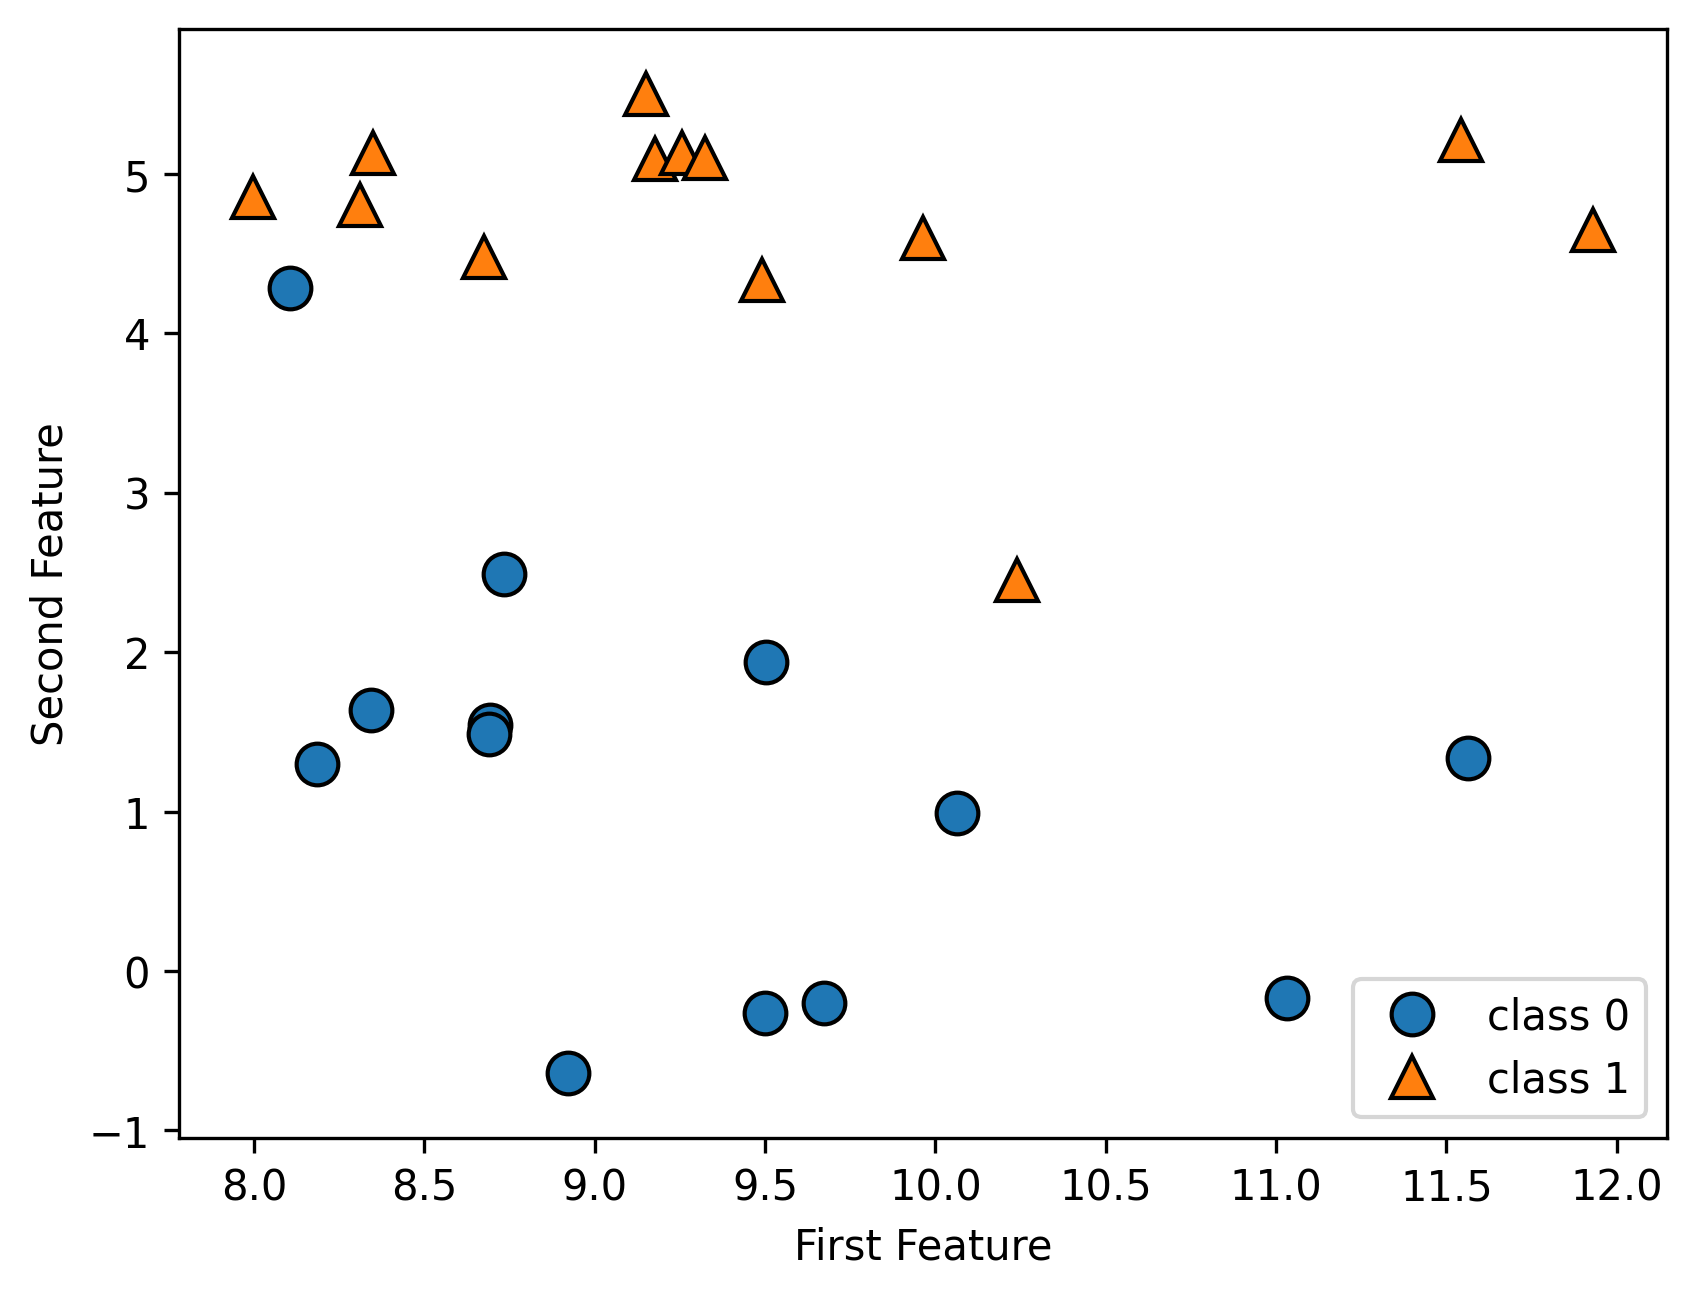

In [40]:
plt.rcParams['figure.dpi'] = 300
X,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print("X.shape :{}".format(X.shape))

Text(0, 0.5, 'target')

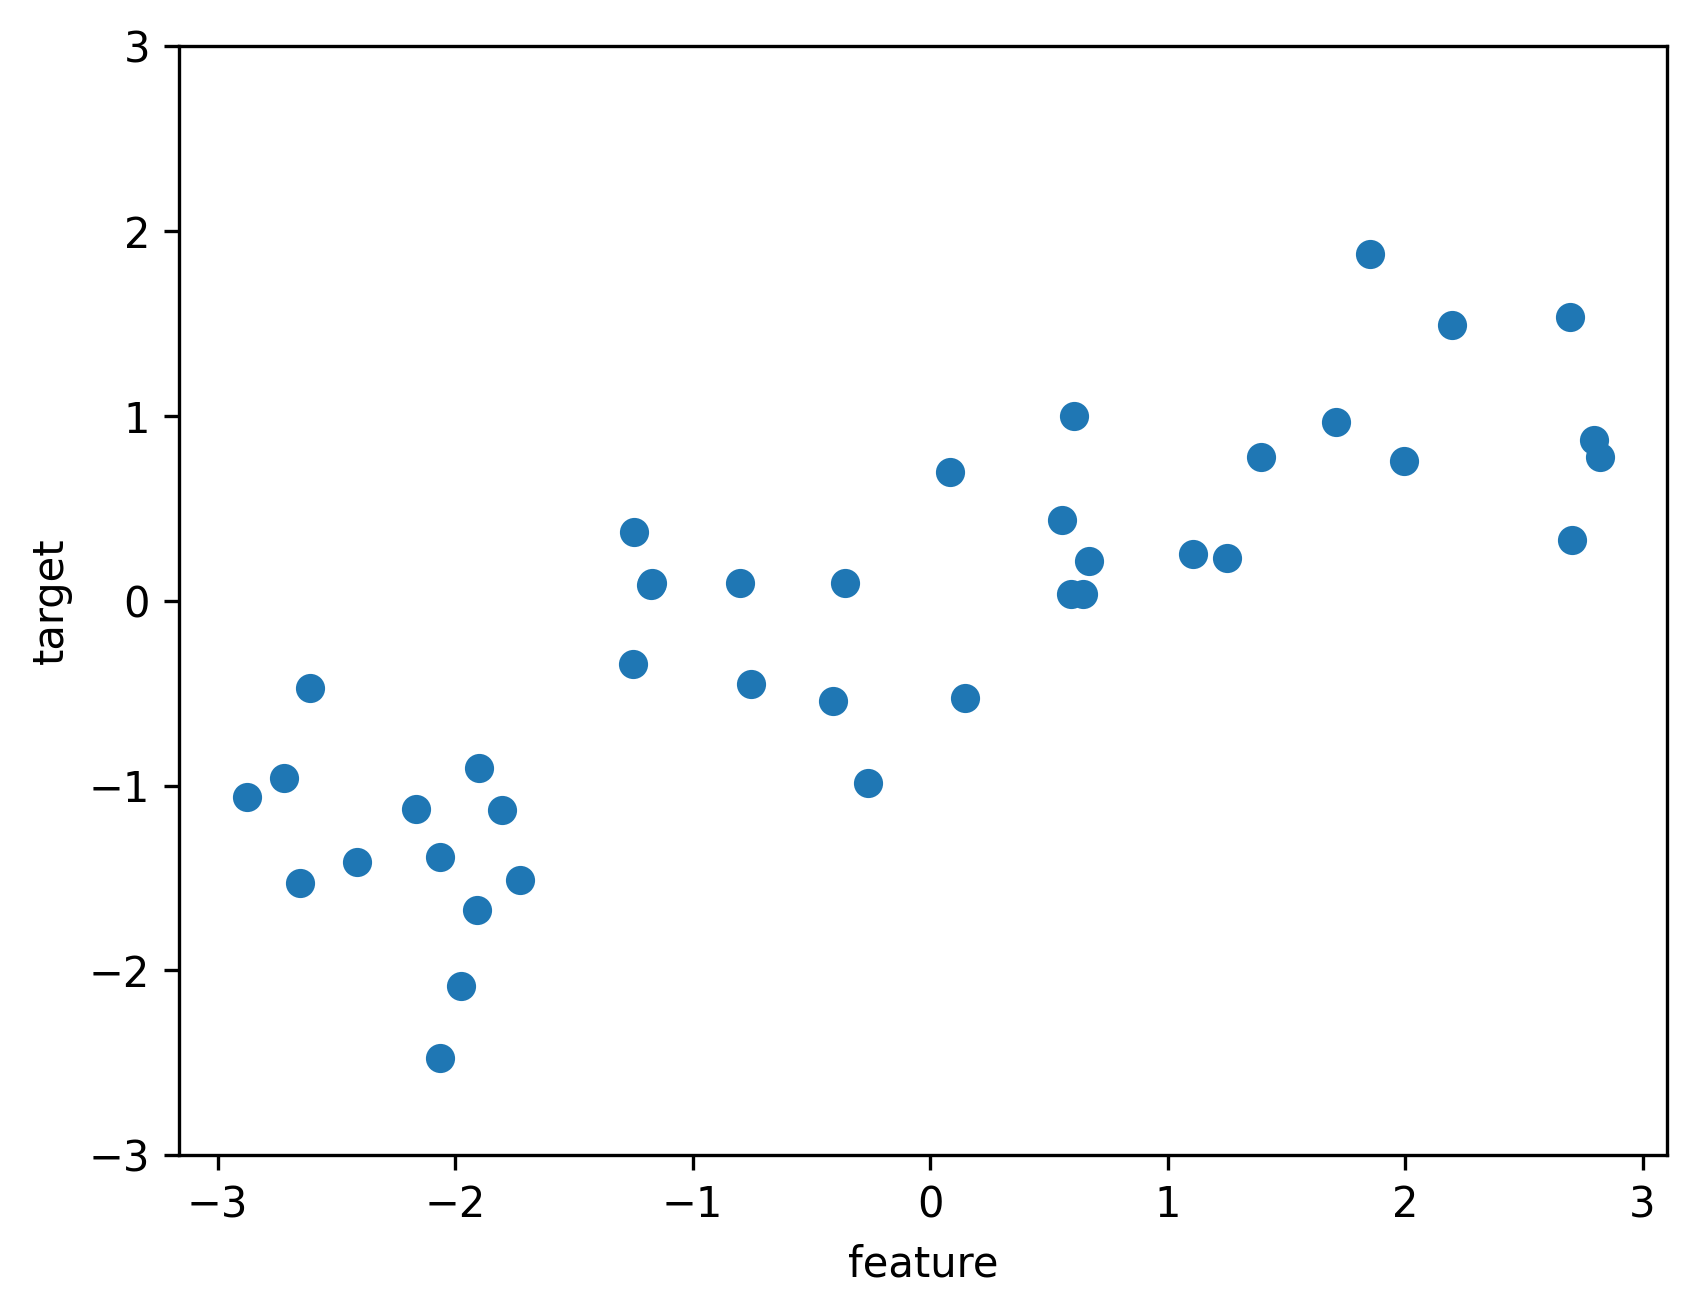

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("feature")
plt.ylabel("target")

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print("유방암 데이터의 형태: {}".format(cancer.data.shape))

유방암 데이터의 형태: (569, 30)


In [6]:
print("클래스별 샘플 갯수 : {}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 갯수 : {'malignant': 212, 'benign': 357}


In [7]:
print("특성 이름 : \n{}",format(cancer.feature_names))

특성 이름 : 
{} ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [19]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data Shape : {}".format(boston.data.shape))

Data Shape : (506, 13)


/home/lee/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

In [9]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape :{}".format(X.shape))

X.shape :(506, 104)


/home/lee/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


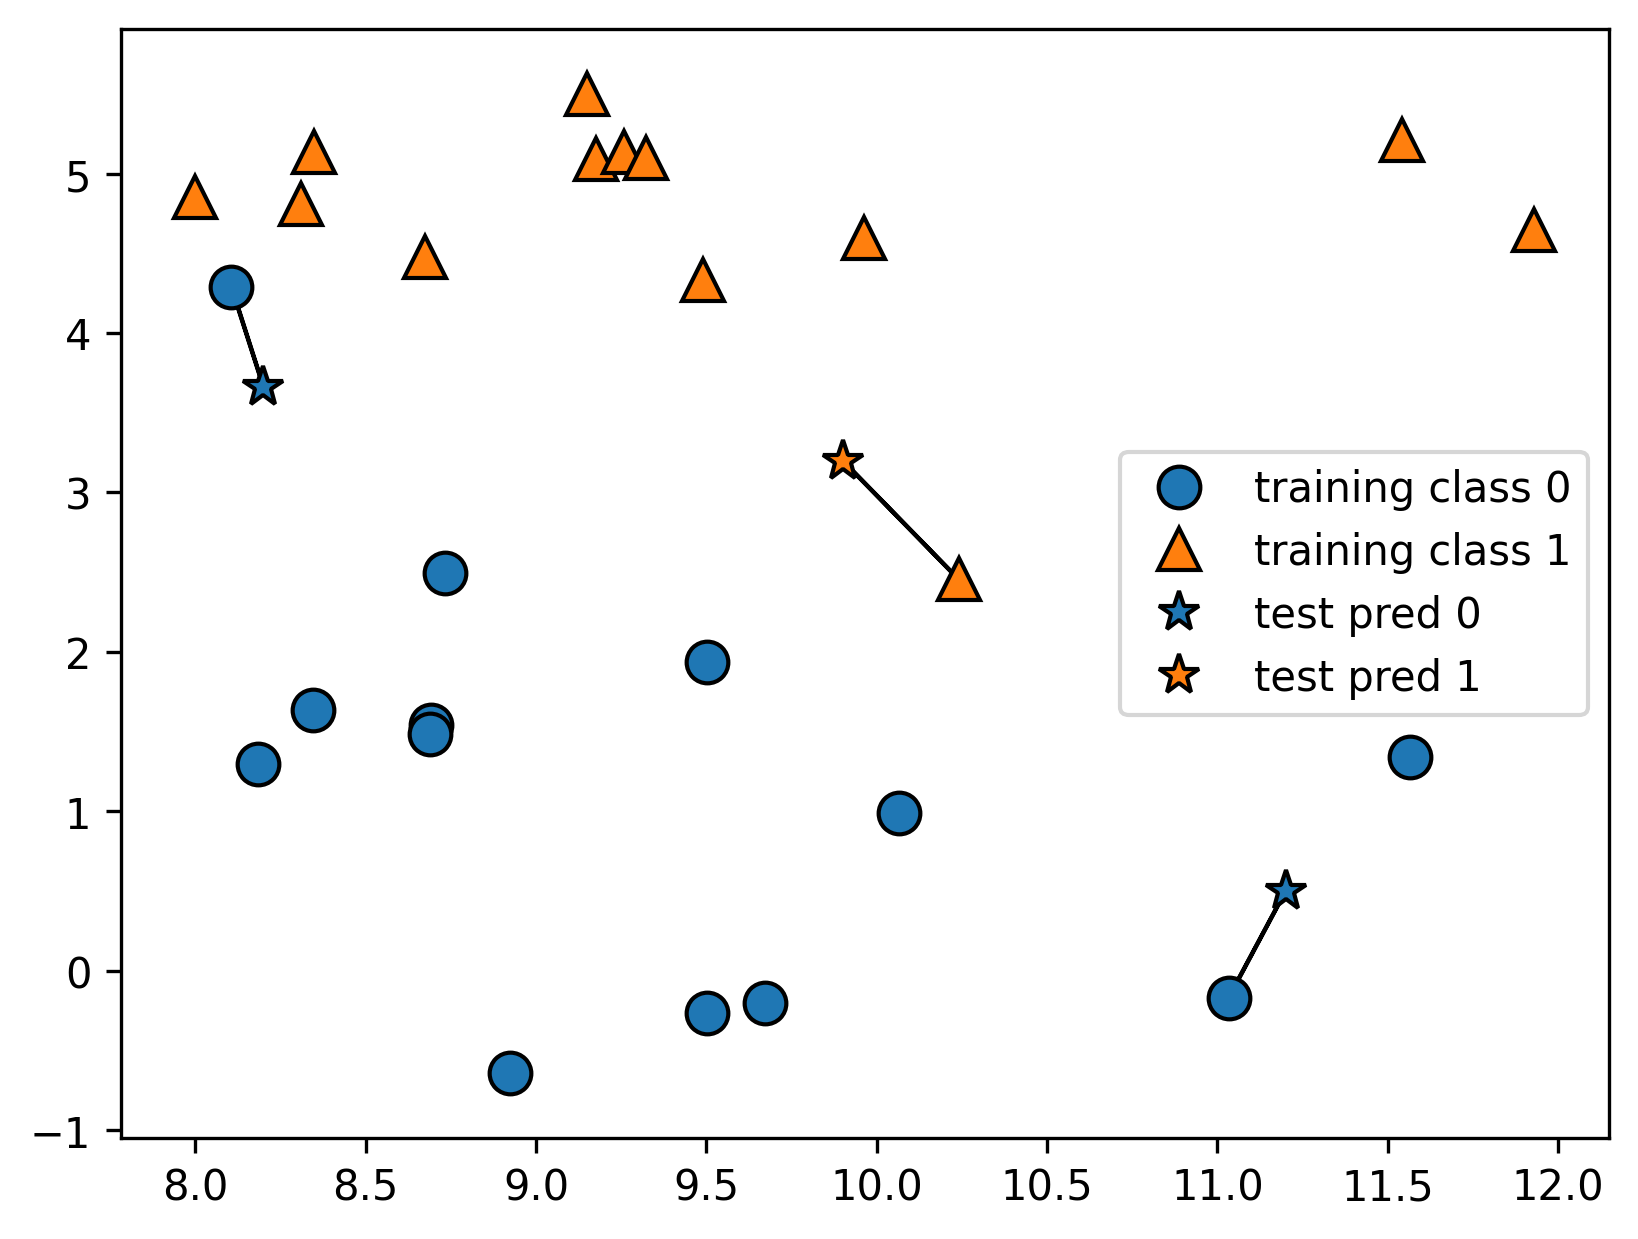

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/home/lee/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


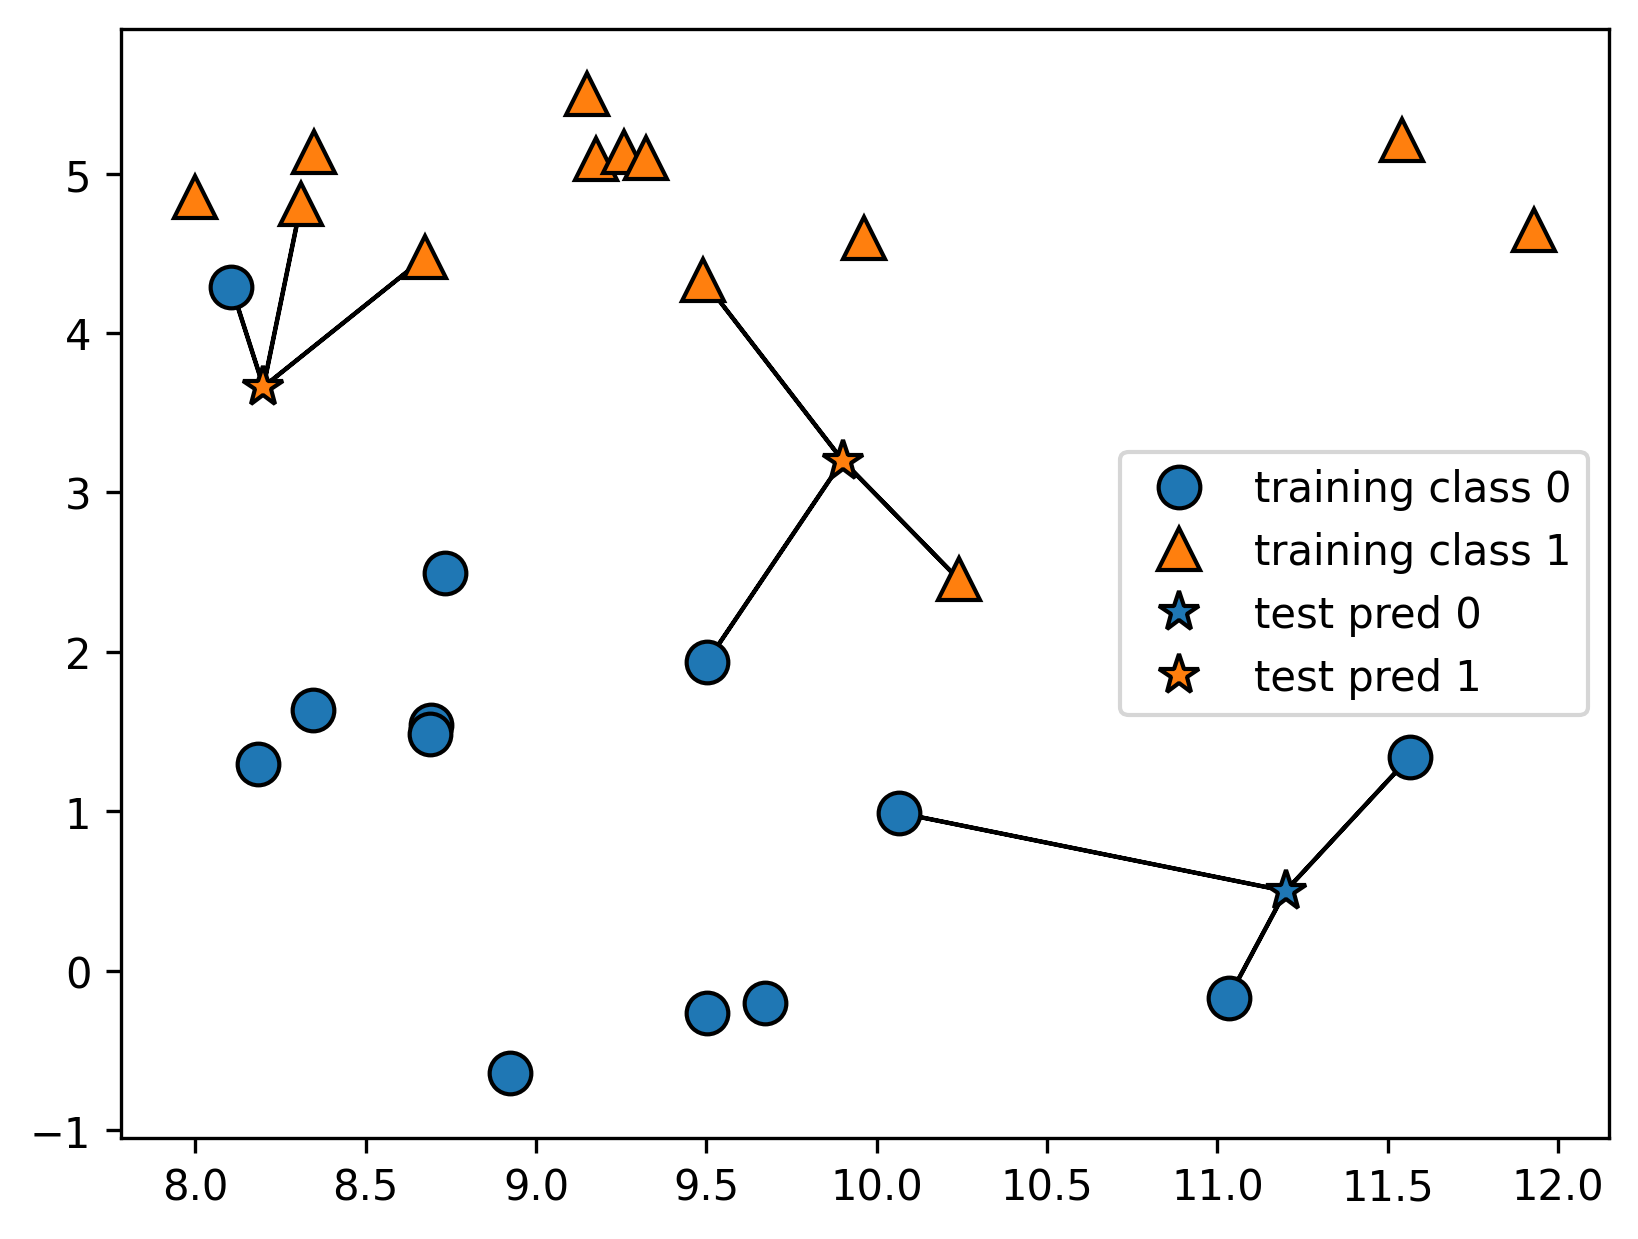

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

/home/lee/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [16]:
print("테스트 세트 정확도 : {:.2f}".format(clf.score(X_test,y_test)))

테스트 세트 정확도 : 0.86


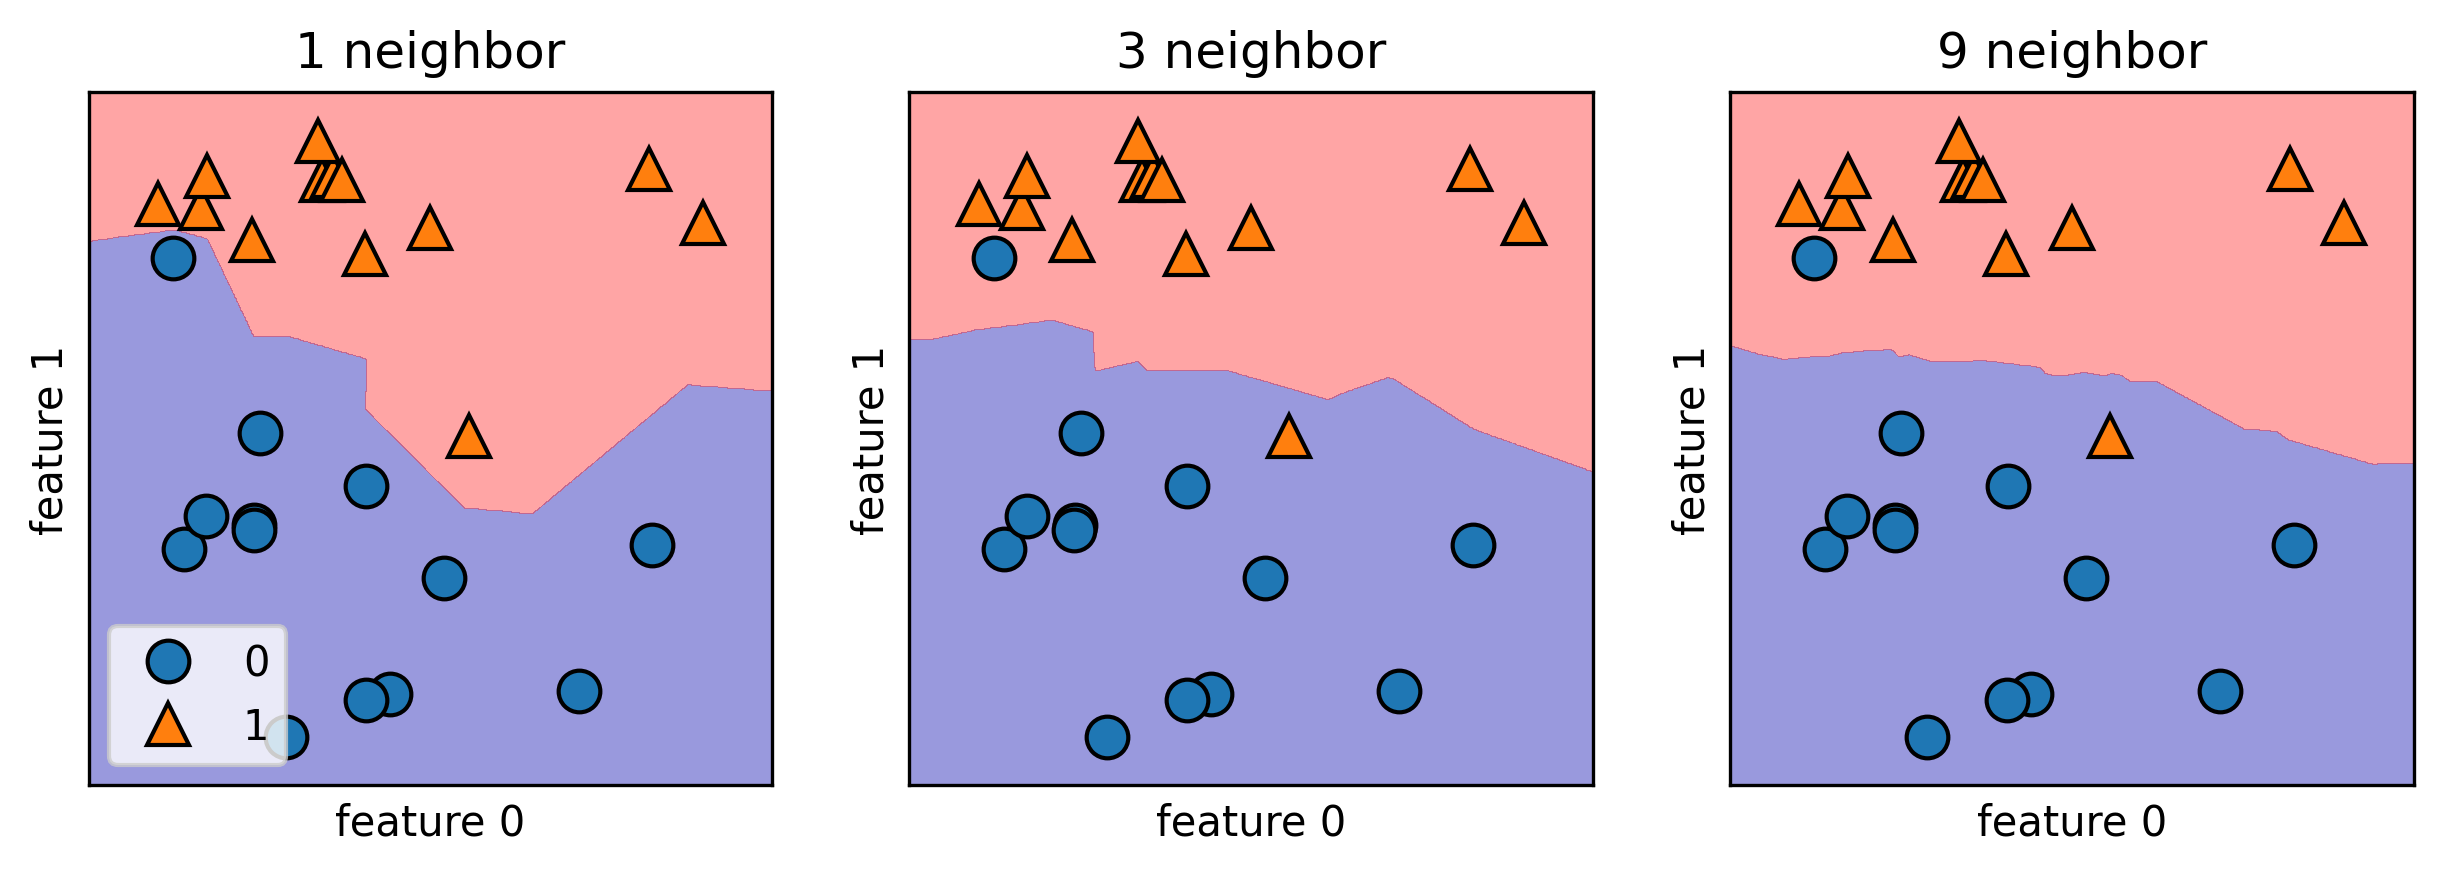

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))
for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbor".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

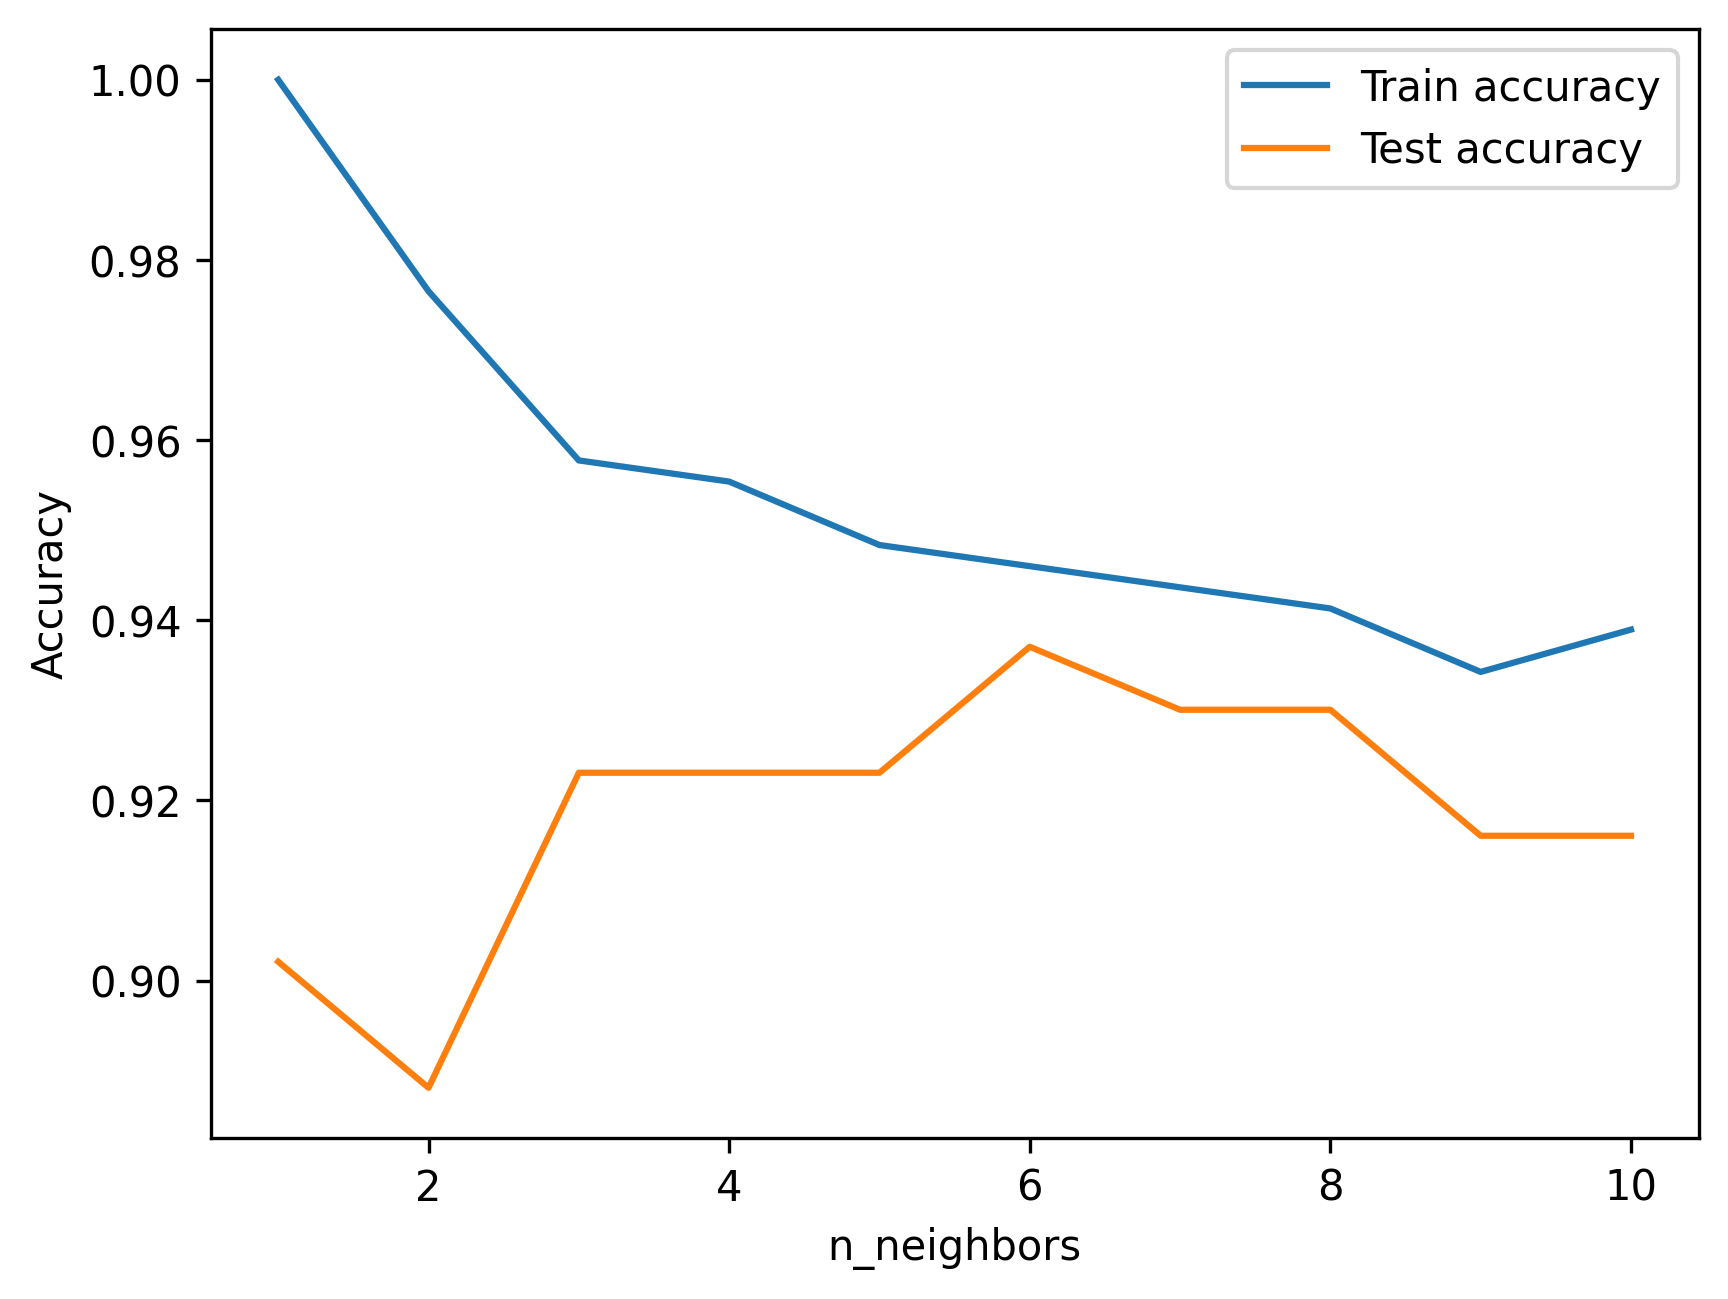

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy=[]
test_accuracy=[]
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))
plt.plot(neighbors_settings, training_accuracy, label="Train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

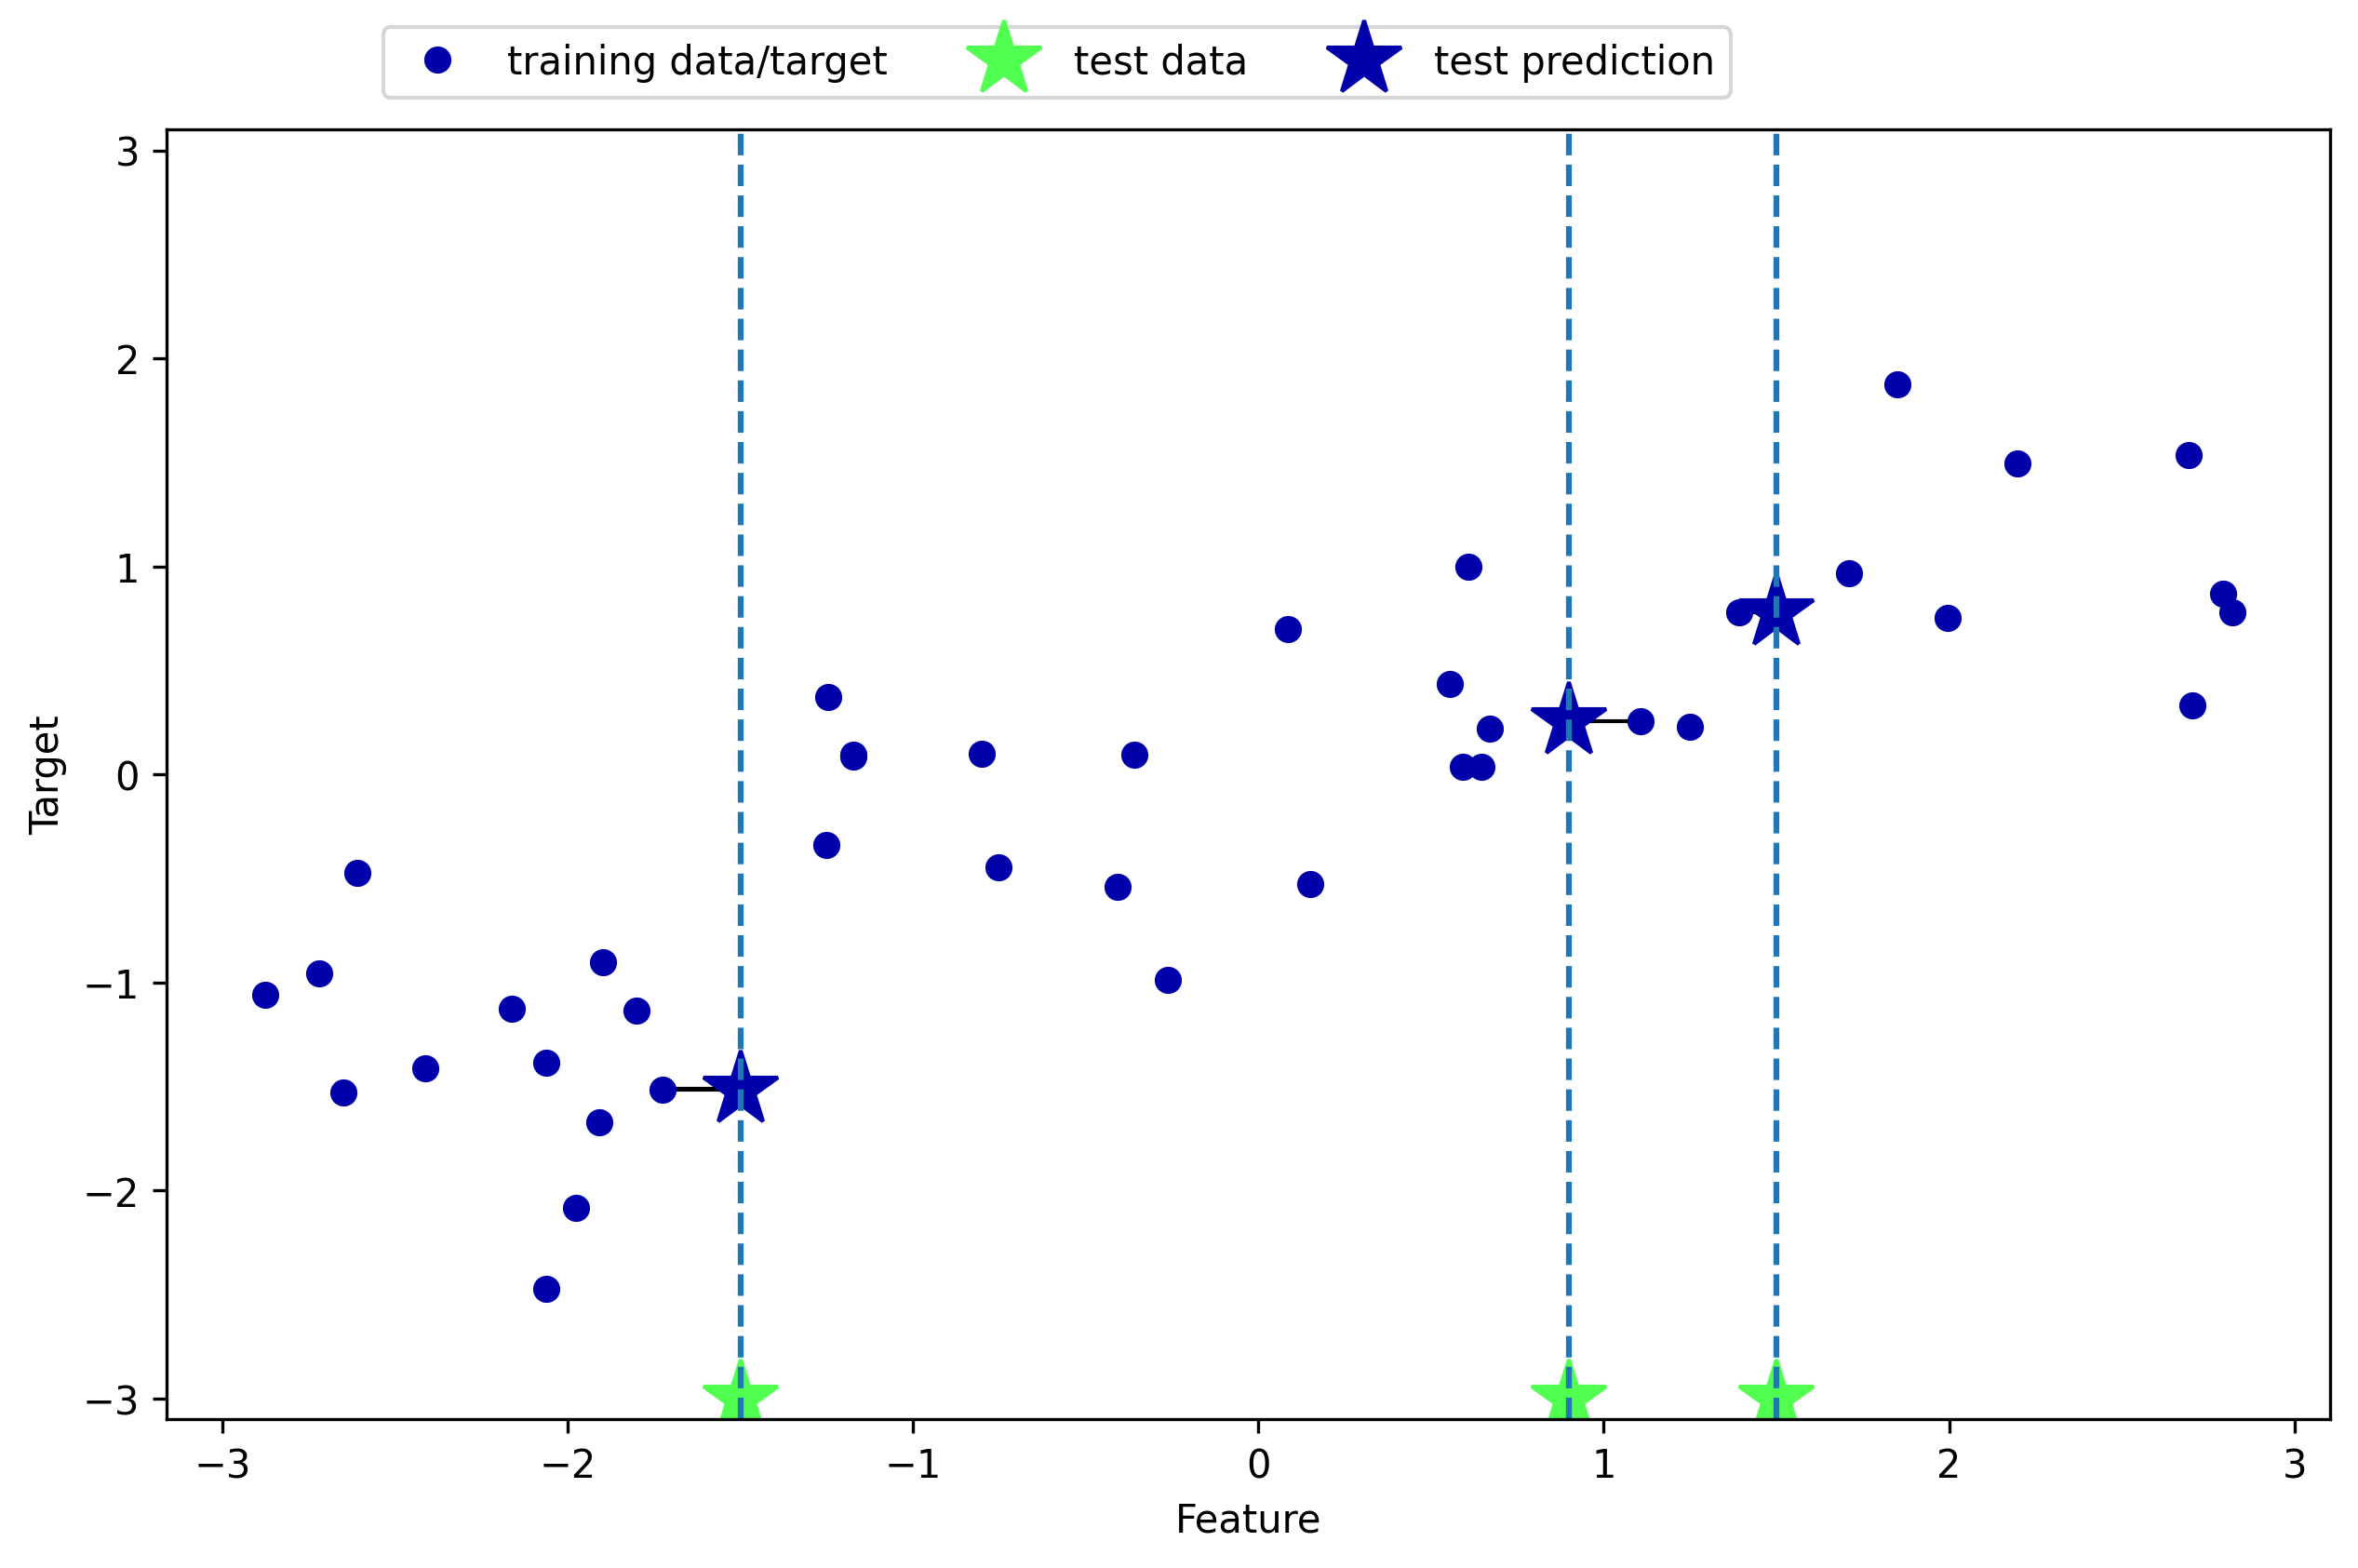

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

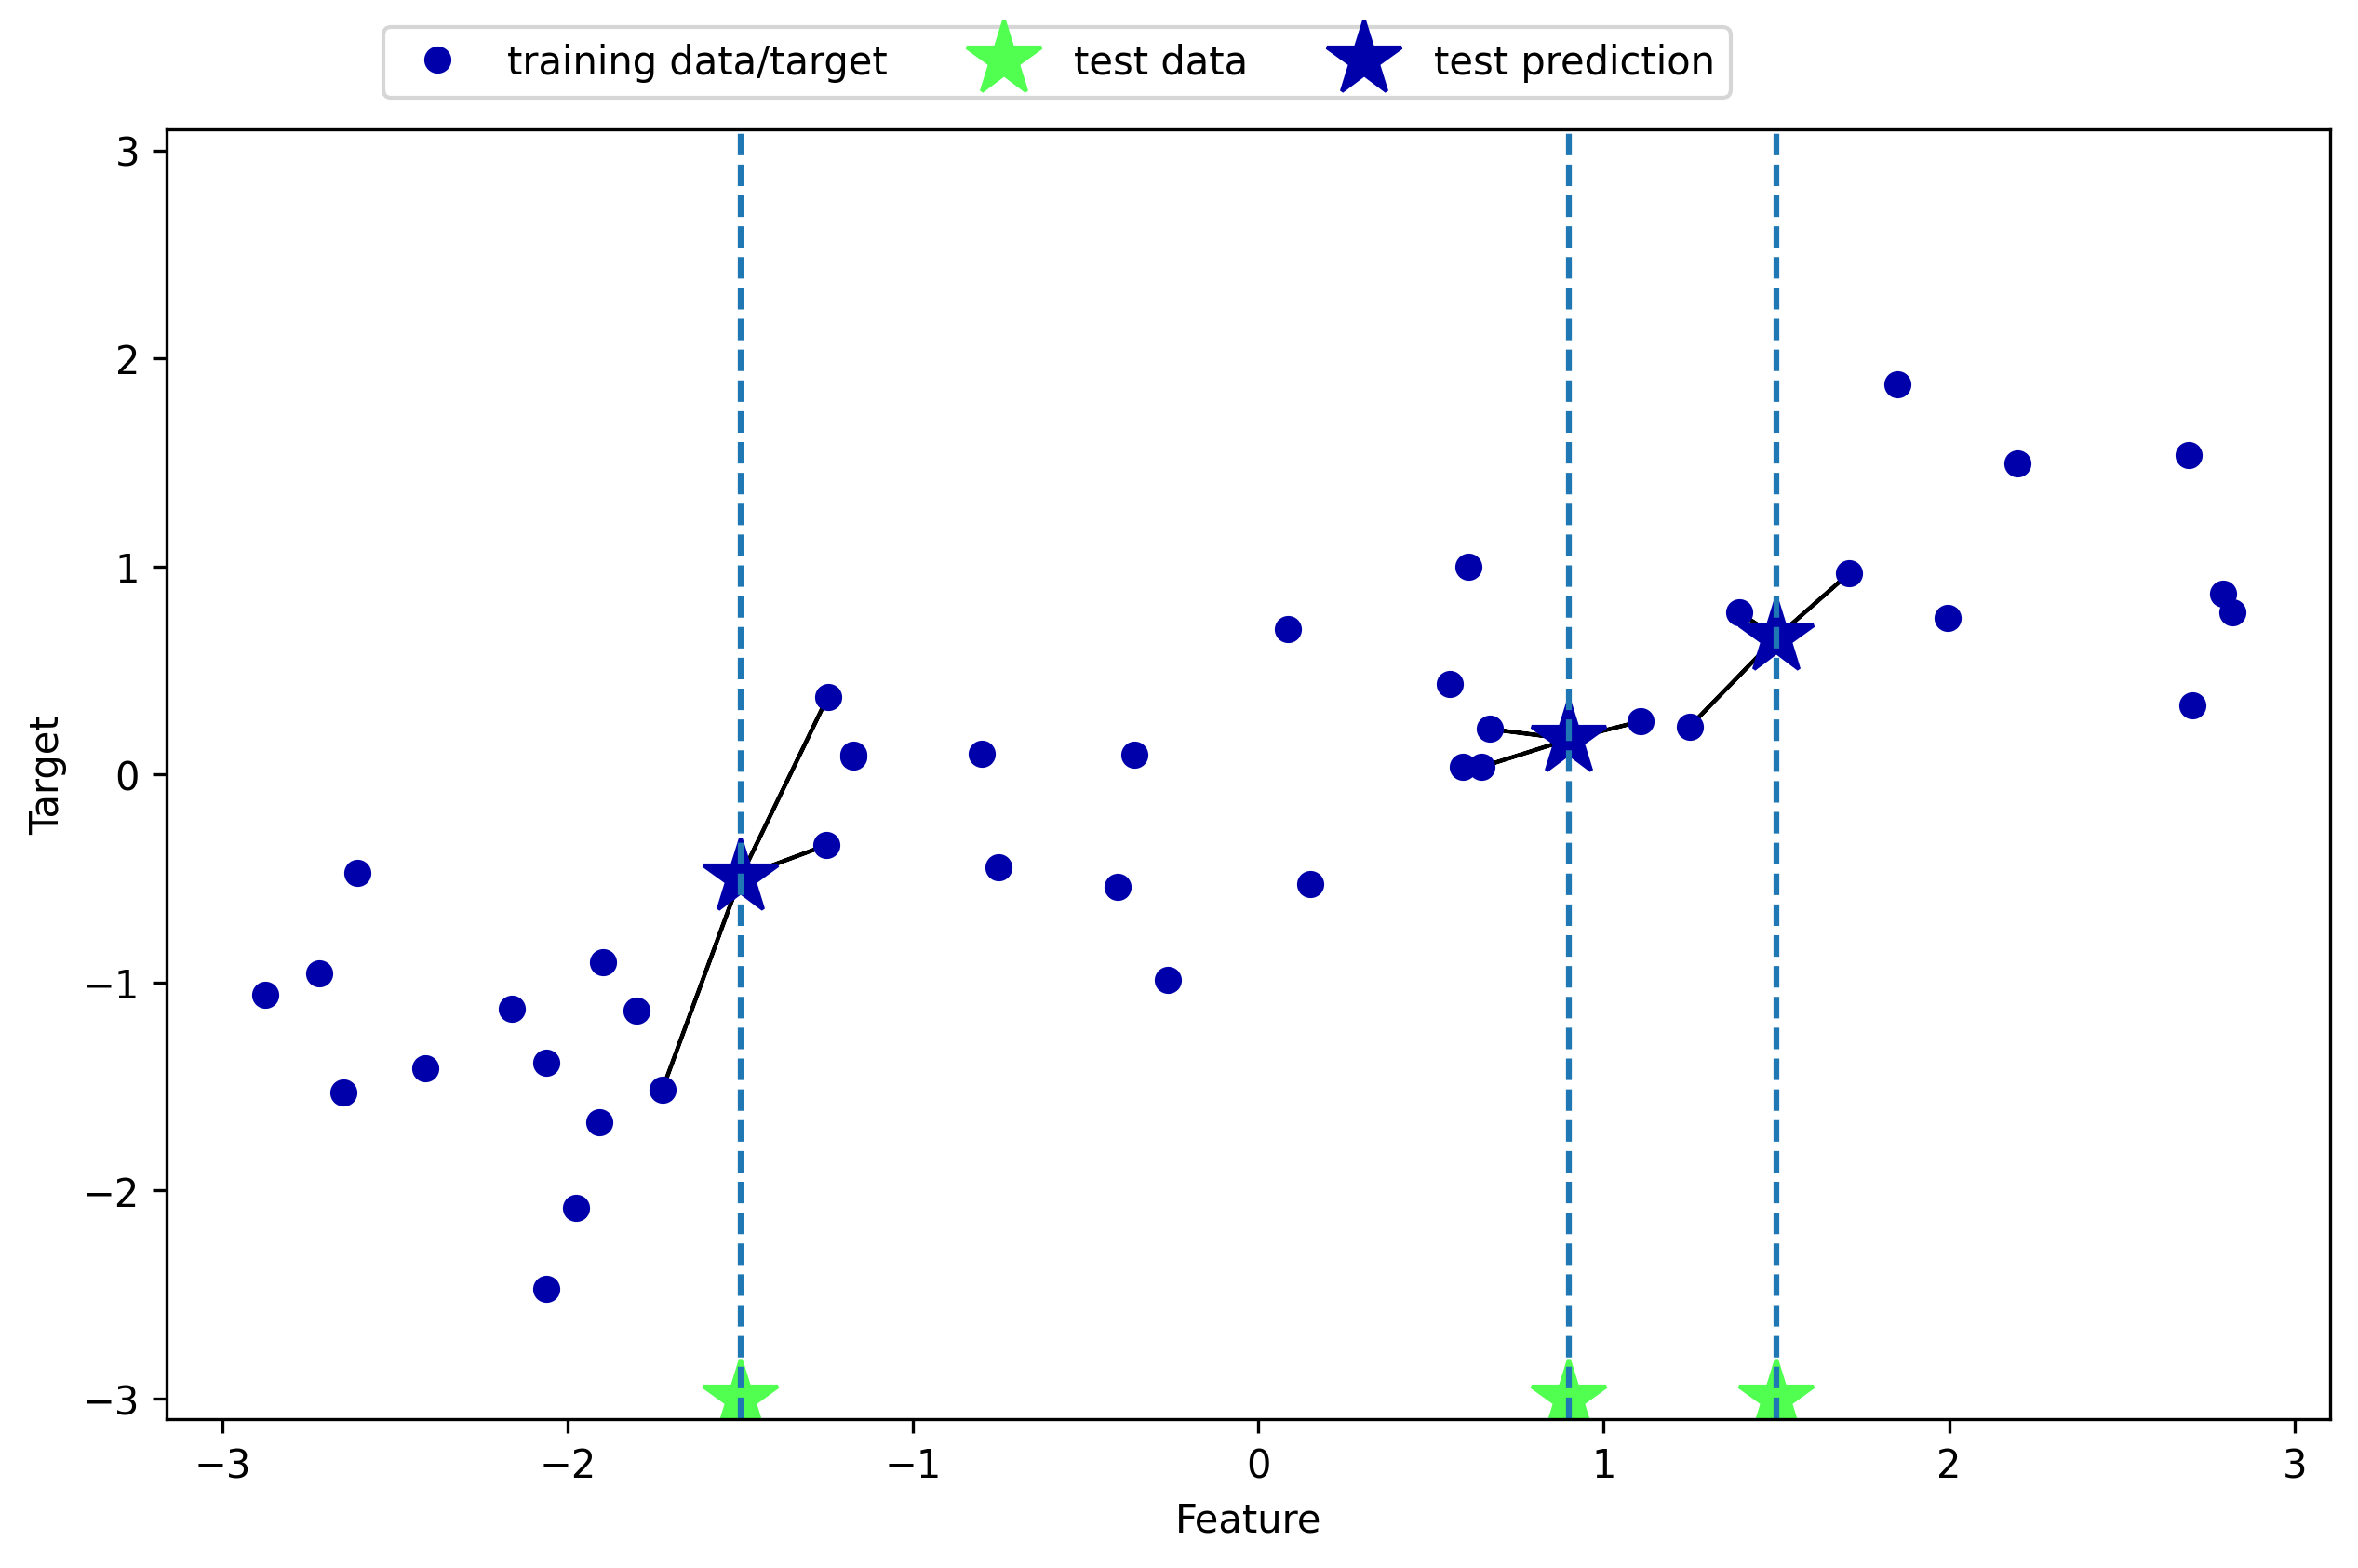

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [24]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [28]:
print("Test set predict: \n{}".format(reg.predict(X_test)))

Test set predict: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [29]:
print("Test set R^2 : {:.2f}".format(reg.score(X_test,y_test)))

Test set R^2 : 0.83


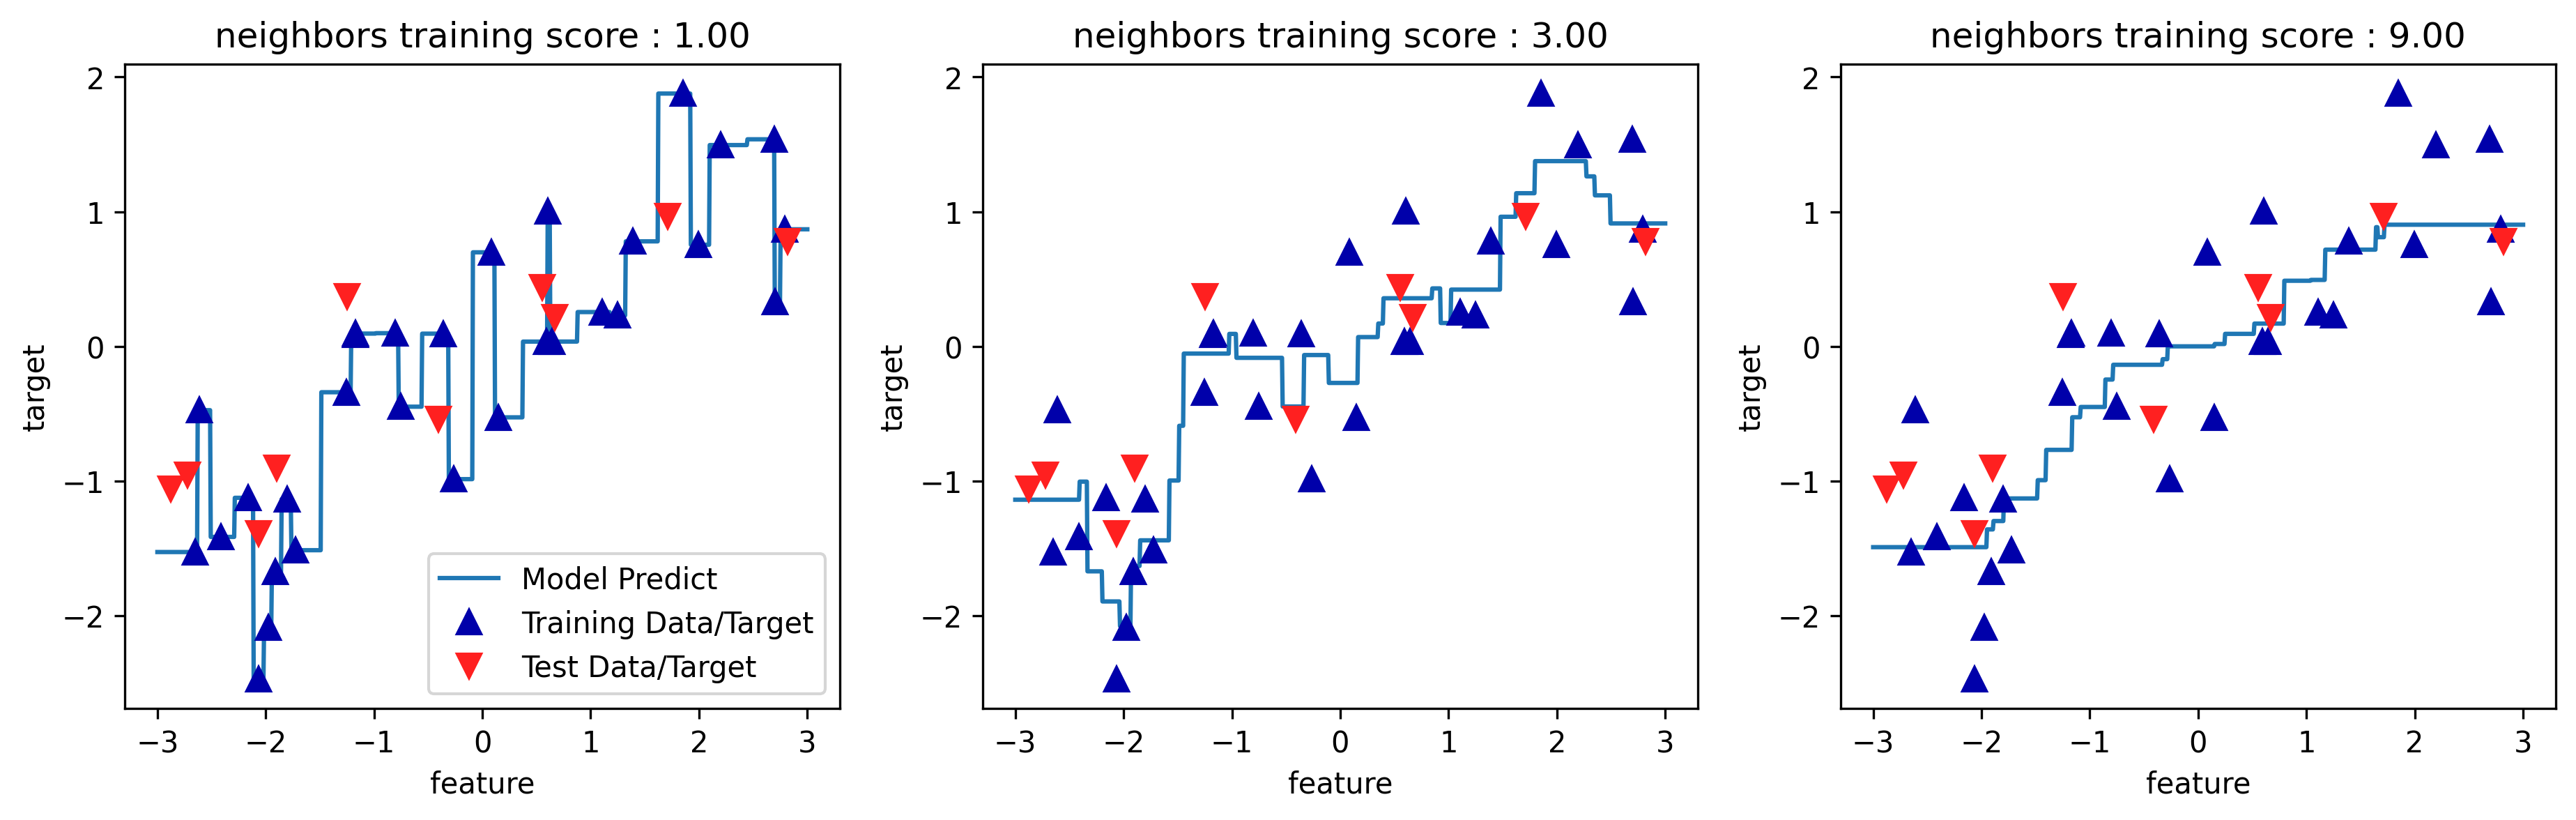

In [37]:
fig, axes = plt.subplots(1,3,figsize=(15,4))

line = np.linspace(-3,3,1000).reshape(-1,1)

for n_neighbors, ax in zip([1,3,9],axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("neighbors training score : {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    
axes[0].legend(["Model Predict", "Training Data/Target", "Test Data/Target"], loc="best")

w[0]: 0.393906  b: -0.031804


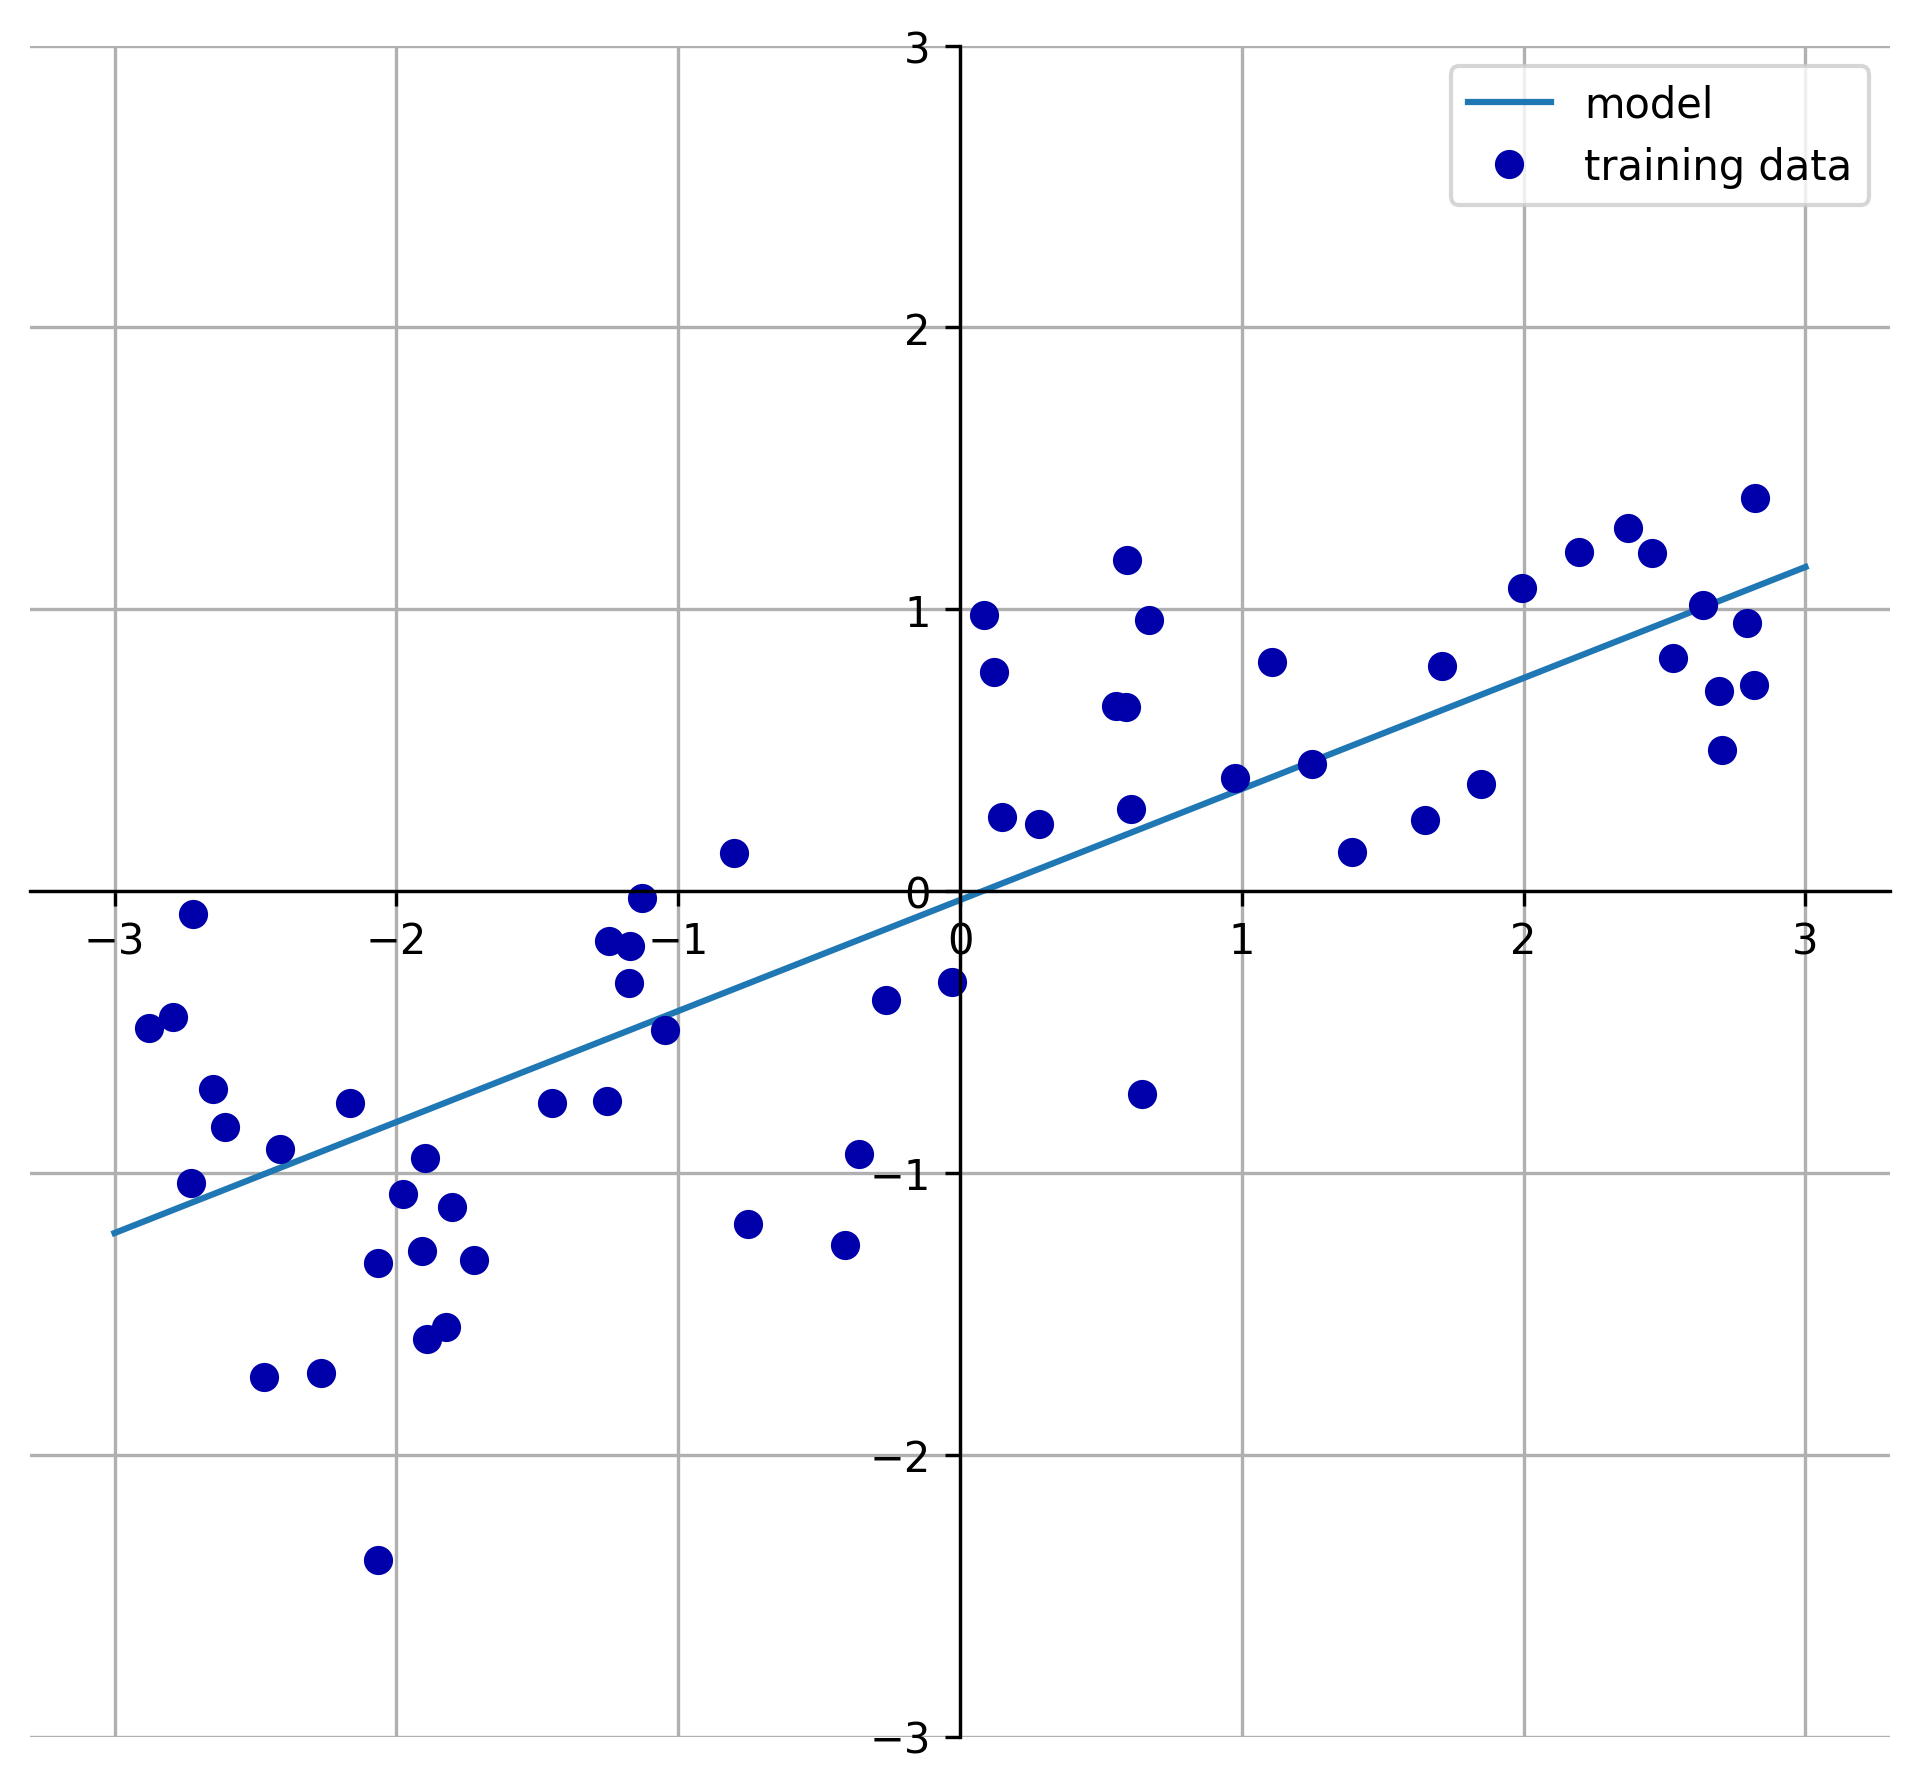

In [41]:
mglearn.plots.plot_linear_regression_wave()

In [42]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)

In [43]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675976


In [48]:
print("Training Set Score : {:.2f}".format(lr.score(X_train,y_train)))
print("Test Set Score : {:.2f}".format(lr.score(X_test,y_test)))

Training Set Score : 0.95
Test Set Score : 0.61


In [46]:
X, y = mglearn.datasets.load_extended_boston()

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

/home/lee/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

In [49]:
print("Training Set Score : {:.2f}".format(lr.score(X_train, y_train)))
print("Test Set Score : {:.2f}".format(lr.score(X_test, y_test)))

Training Set Score : 0.95
Test Set Score : 0.61


In [50]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training Set Score :{:.2f}".format(ridge.score(X_train,y_train)))
print("Test Set Score :{:.2f}".format(ridge.score(X_test,y_test)))

Training Set Score :0.89
Test Set Score :0.75


In [51]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training Set Score : {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test Set Score :{:.2f}".format(ridge10.score(X_test, y_test)))

Training Set Score : 0.79
Test Set Score :0.64


In [53]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training Set Score : {:.2f}".format(ridge01.score(X_train,y_train)))
print("Test Set Score : {:.2f}".format(ridge01.score(X_test,y_test)))

Training Set Score : 0.93
Test Set Score : 0.77


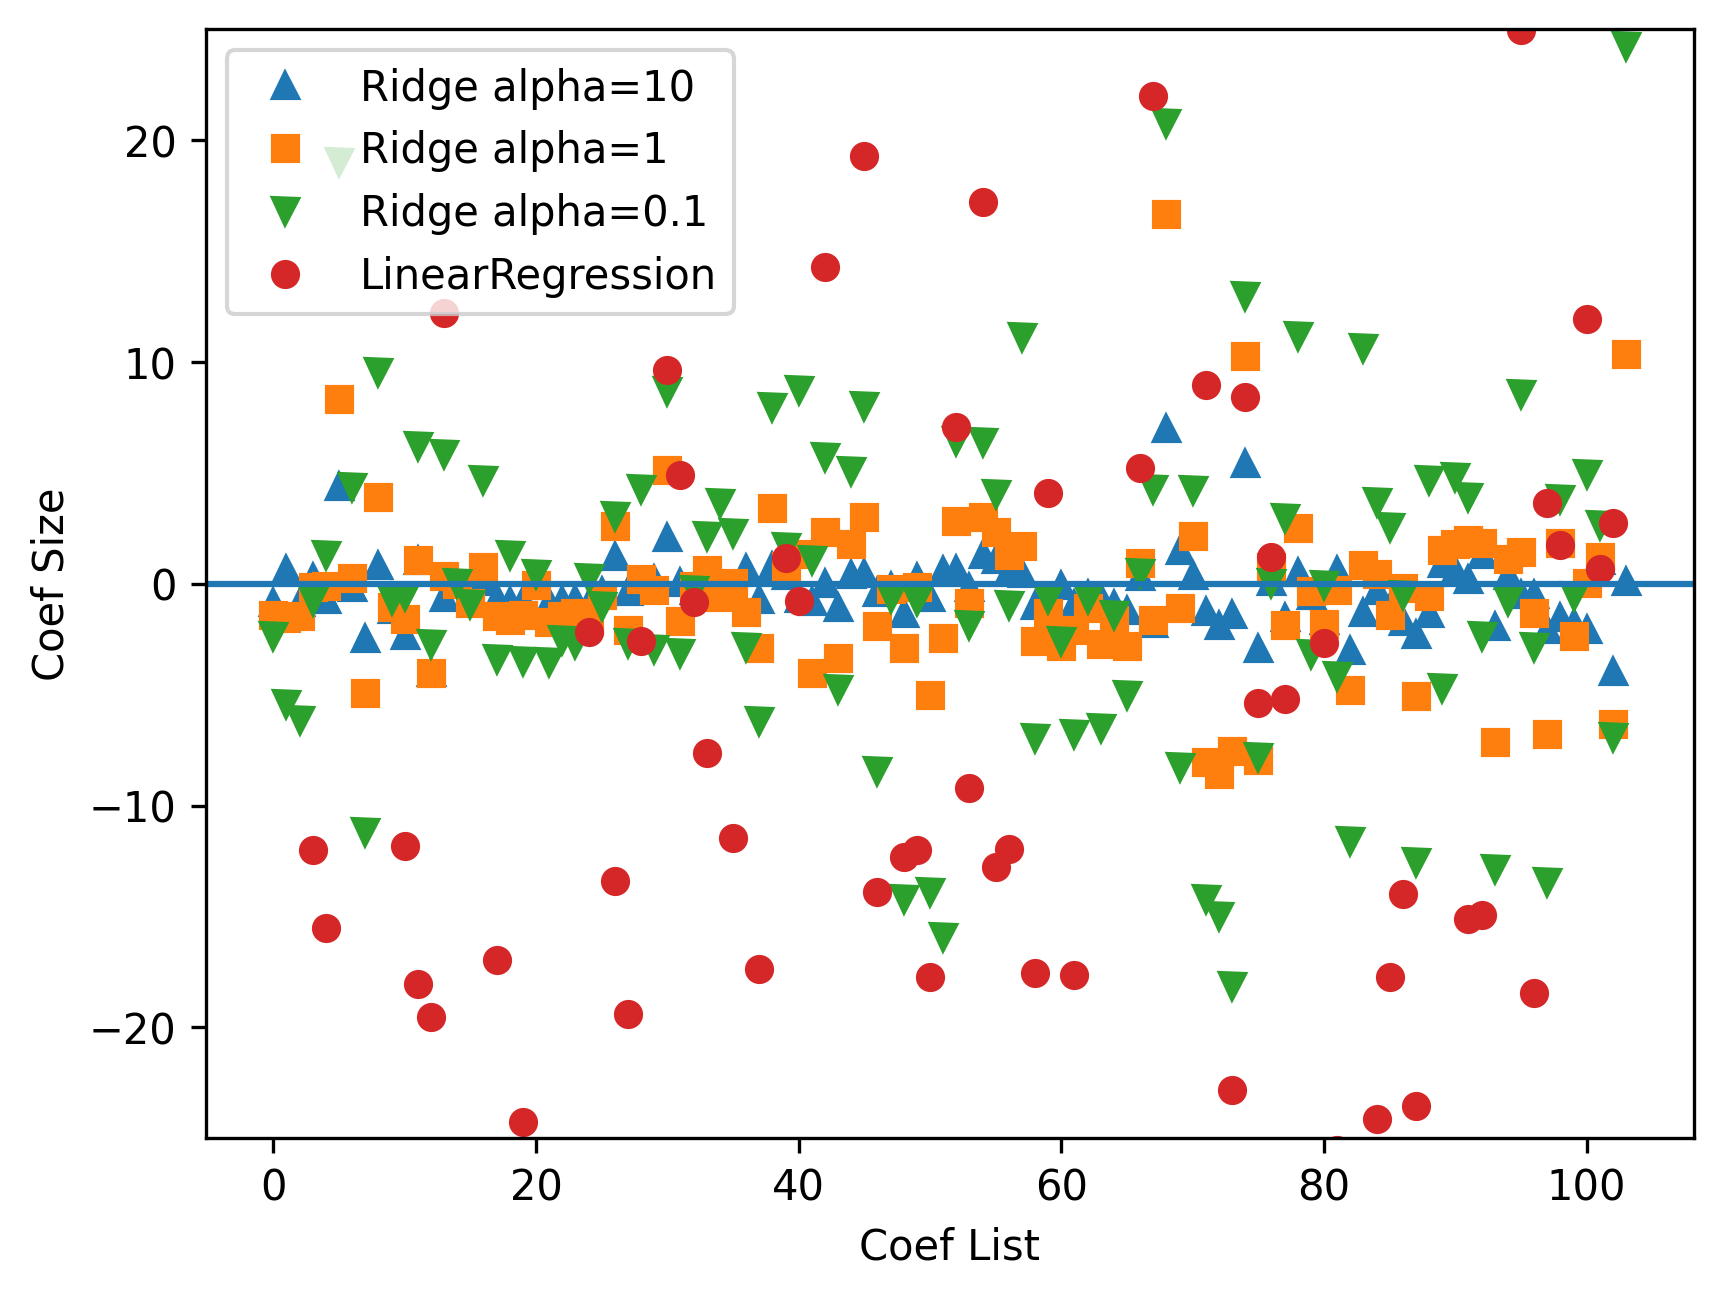

In [55]:
plt.plot(ridge10.coef_,'^',label="Ridge alpha=10")
plt.plot(ridge.coef_,'s',label="Ridge alpha=1")
plt.plot(ridge01.coef_,'v',label="Ridge alpha=0.1")

plt.plot(lr.coef_,'o',label="LinearRegression")
plt.xlabel("Coef List")
plt.ylabel("Coef Size")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

/home/lee/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

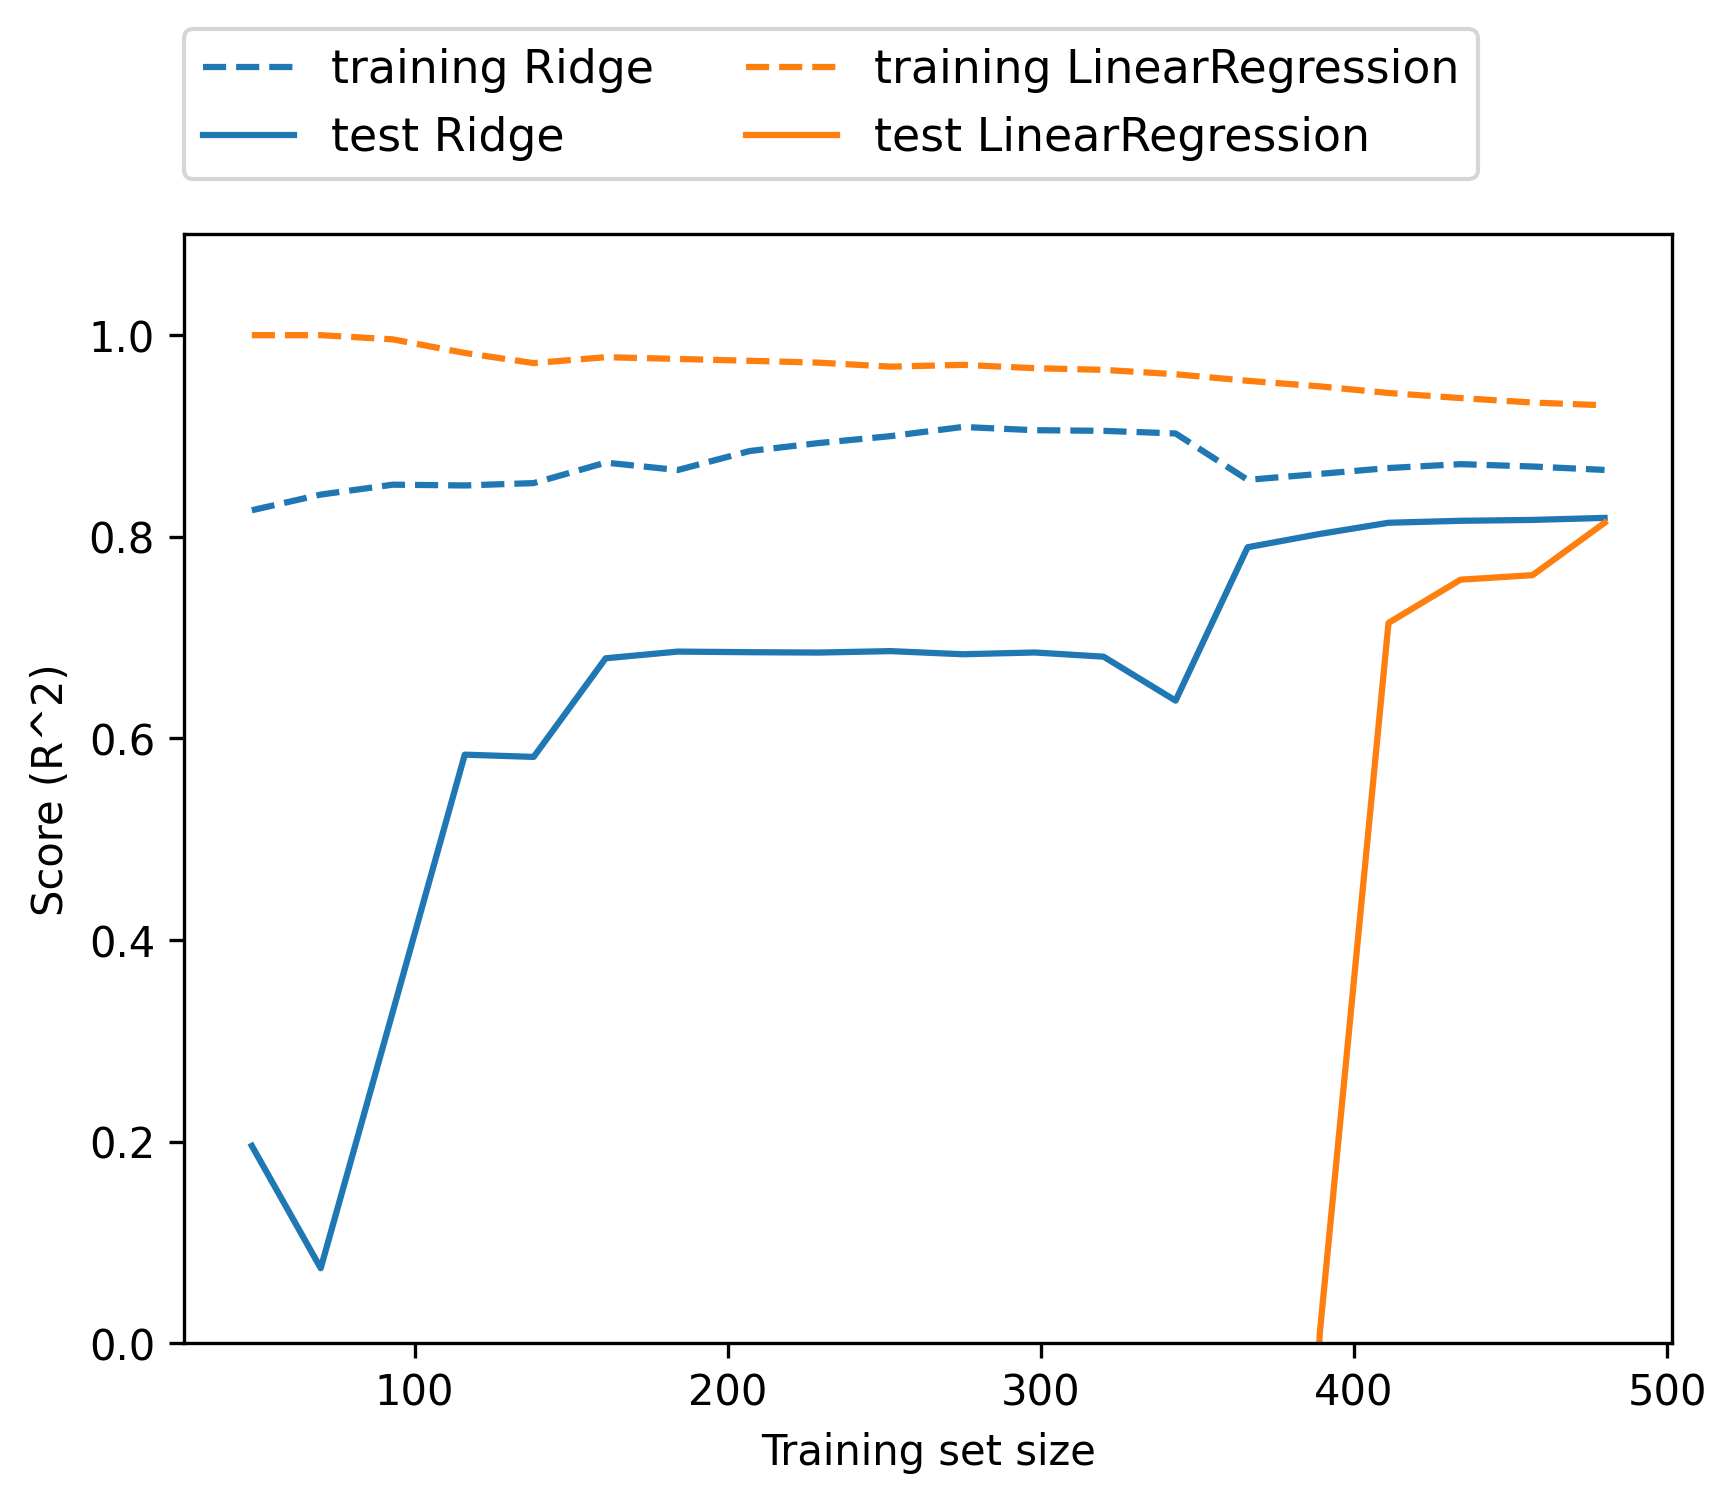

In [56]:
mglearn.plots.plot_ridge_n_samples()

In [58]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)
print("Training Set Score: {:.2f}".format(lasso.score(X_train,y_train)))
print("Test Set Score: {:.2f}".format(lasso.score(X_test,y_test)))
print("Using Coef Count: {}".format(np.sum(lasso.coef_ != 0)))

Training Set Score: 0.29
Test Set Score: 0.21
Using Coef Count: 4


In [59]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train,y_train)
print("Training Set Score: {:.2f}".format(lasso001.score(X_train,y_train)))
print("Test Set Score: {:.2f}".format(lasso001.score(X_test,y_test)))
print("Using Coef Count: {}".format(np.sum(lasso001.coef_ != 0)))

Training Set Score: 0.90
Test Set Score: 0.77
Using Coef Count: 33


In [60]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train,y_train)
print("Training Set Score: {:.2f}".format(lasso00001.score(X_train,y_train)))
print("Test Set Score: {:.2f}".format(lasso00001.score(X_test,y_test)))
print("Using Coef Count: {}".format(np.sum(lasso00001.coef_ != 0)))

Training Set Score: 0.95
Test Set Score: 0.64
Using Coef Count: 96


Text(0, 0.5, 'Coef Size')

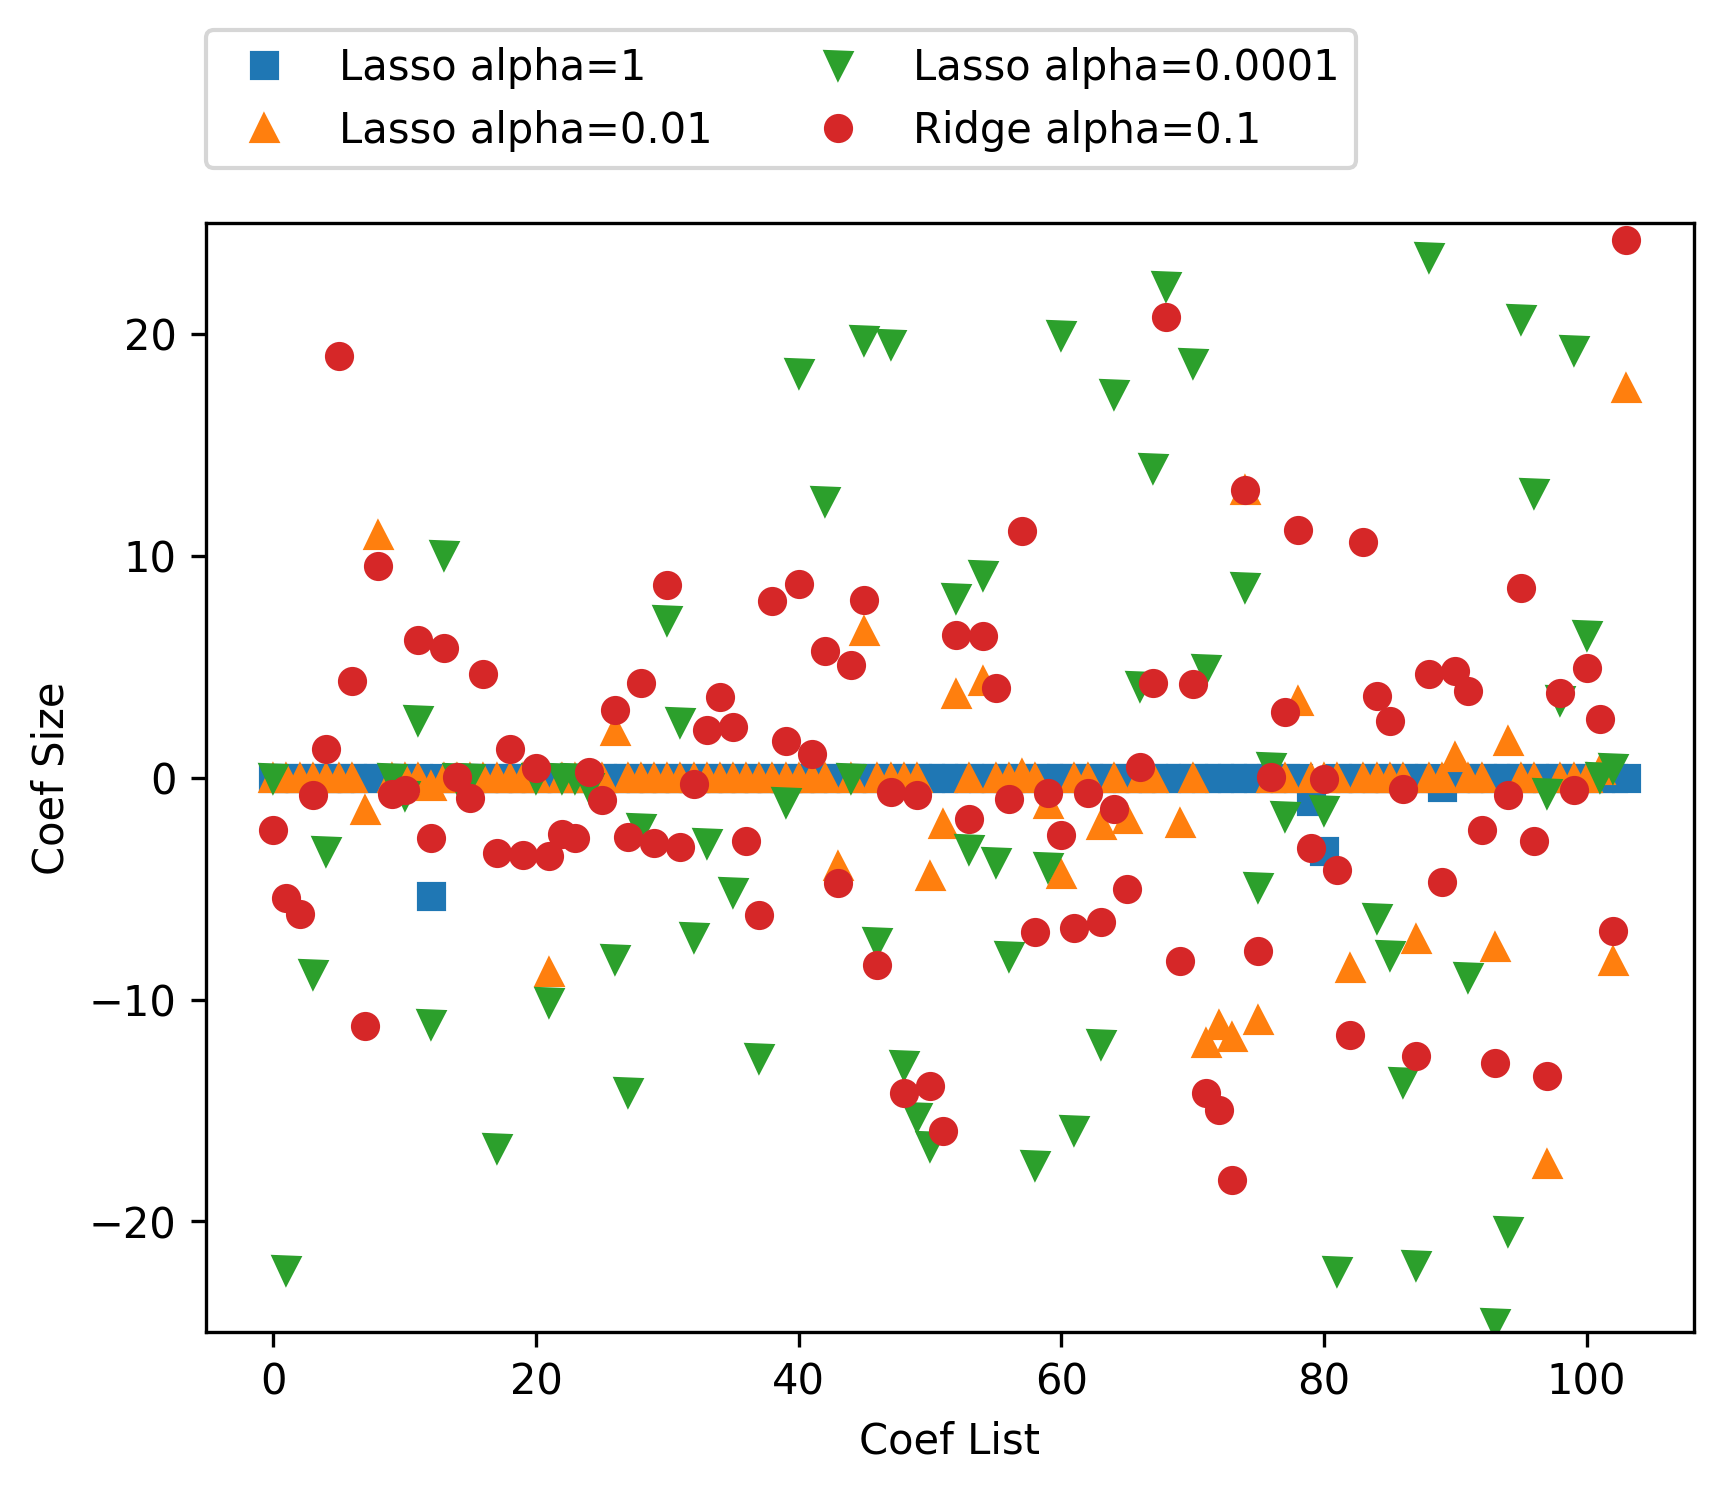

In [62]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_,'o',label="Ridge alpha=0.1")
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("Coef List")
plt.ylabel("Coef Size")

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

# 데이터 로드
X, y = mglearn.datasets.load_extended_boston()

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# ElasticNet 모델 초기화
elastic_net1 = ElasticNet(alpha=0.01, l1_ratio=1, random_state=42)
elastic_net2 = ElasticNet(alpha=0.05, l1_ratio=0.5, random_state=42)
elastic_net3 = ElasticNet(alpha=1, l1_ratio=0.1, random_state=42)

# 모델 훈련
elastic_net1.fit(X_train, y_train)
elastic_net2.fit(X_train, y_train)
elastic_net3.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred1 = elastic_net1.predict(X_test)
y_pred2 = elastic_net2.predict(X_test)
y_pred3 = elastic_net3.predict(X_test)

# 성능 평가
mse1 = mean_squared_error(y_test, y_pred1)
print("Mean Squared Error:", mse1)

mse2 = mean_squared_error(y_test, y_pred2)
print("Mean Squared Error:", mse2)

mse3 = mean_squared_error(y_test, y_pred3)
print("Mean Squared Error:", mse3)


Mean Squared Error: 13.753873188913044
Mean Squared Error: 20.902388238150213
Mean Squared Error: 44.19469828460508


/home/lee/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

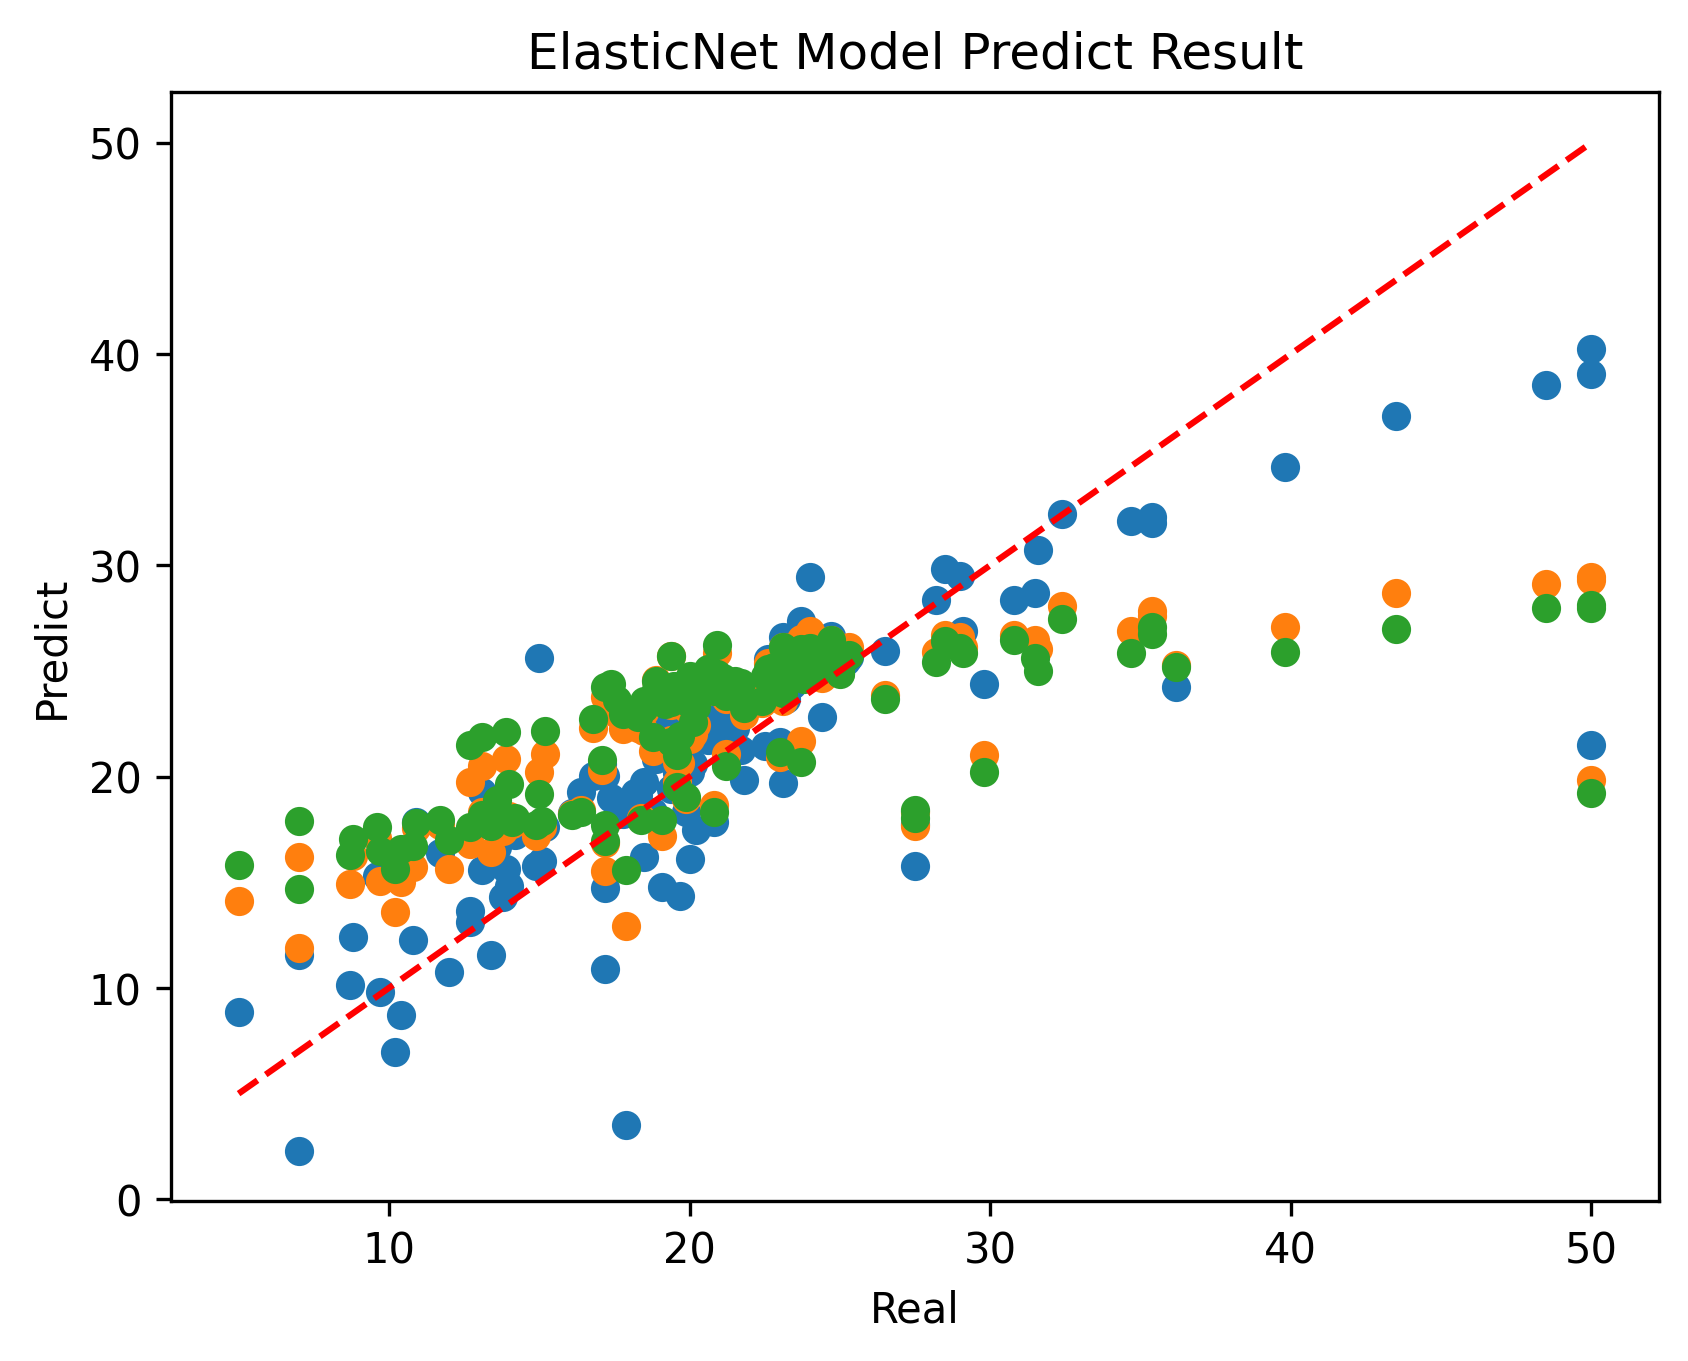

In [101]:
plt.scatter(y_test, y_pred1)
plt.scatter(y_test, y_pred2)
plt.scatter(y_test, y_pred3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel("Real")
plt.ylabel("Predict")
plt.title("ElasticNet Model Predict Result")
plt.show()

/home/lee/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/home/lee/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


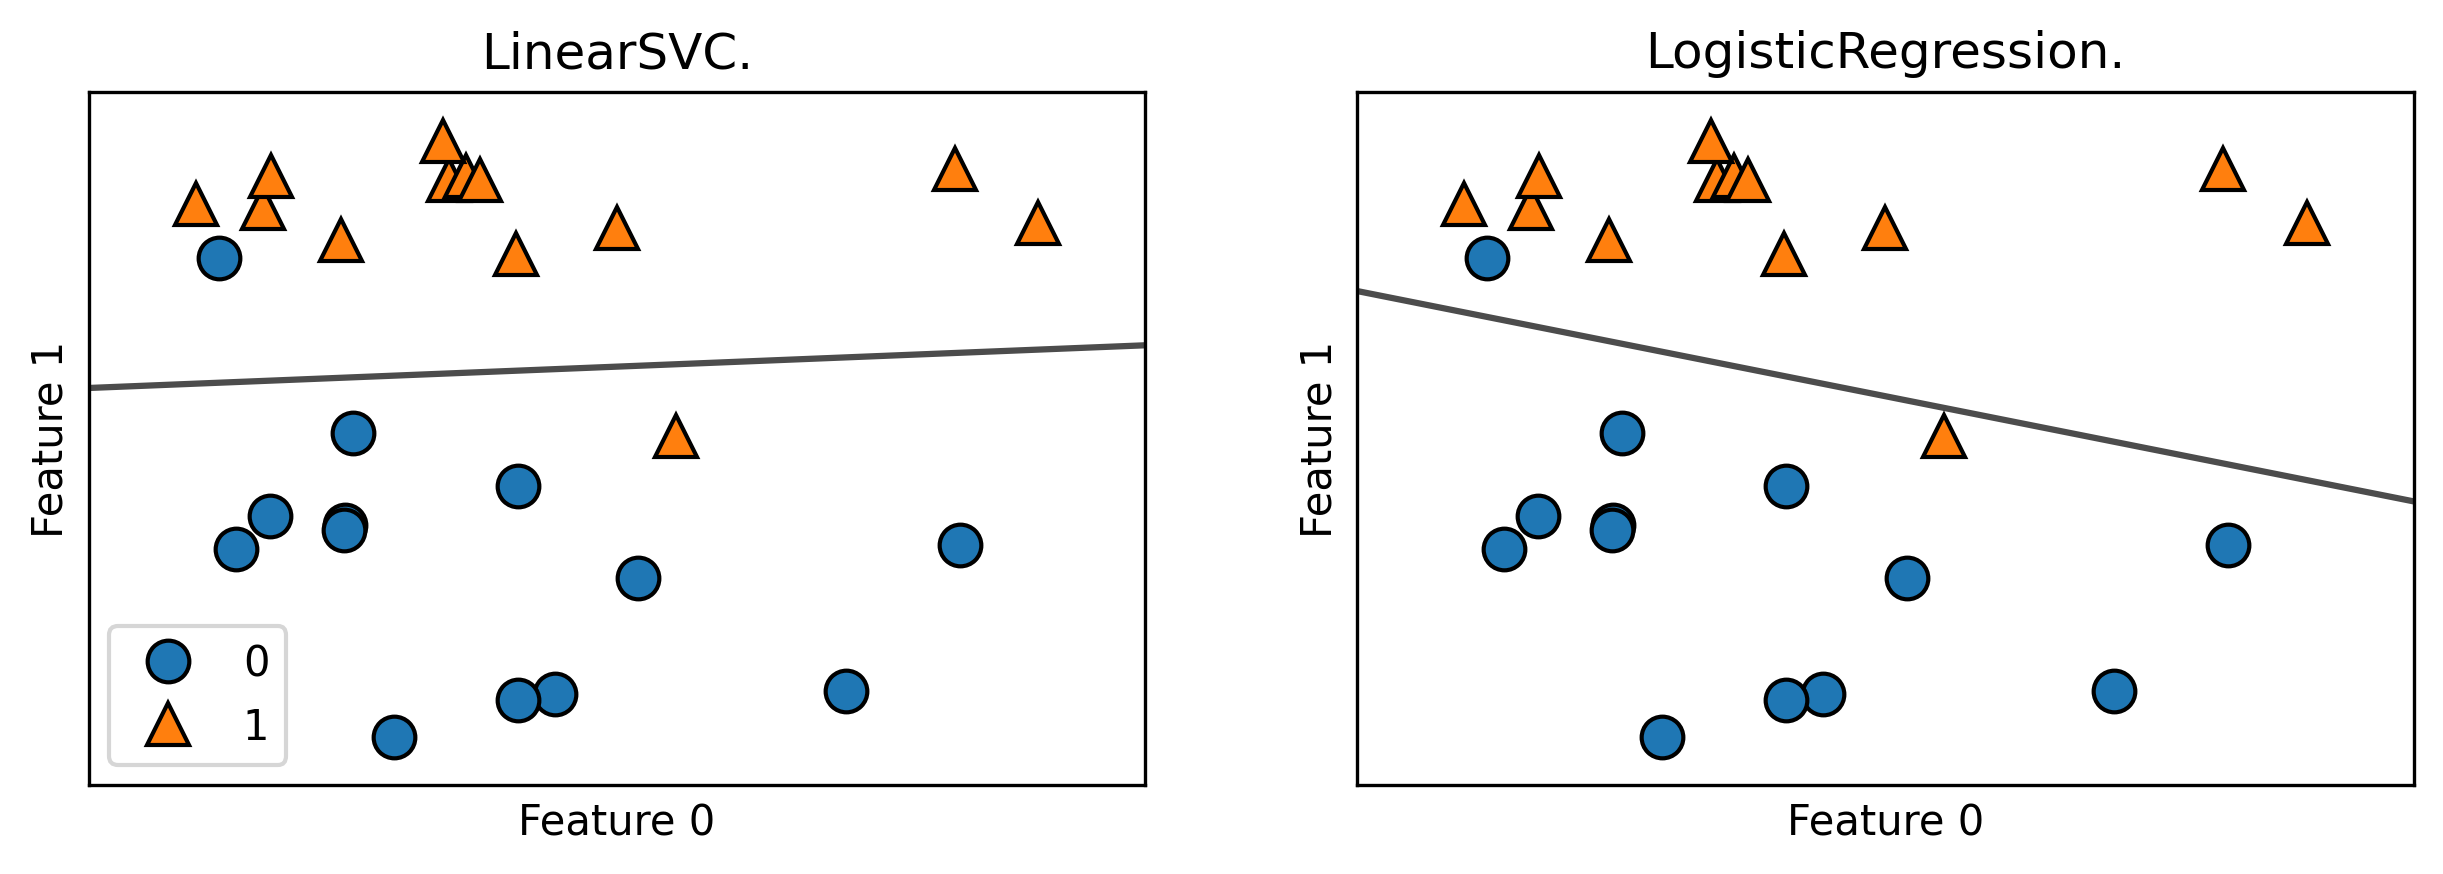

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y= mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{}.".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

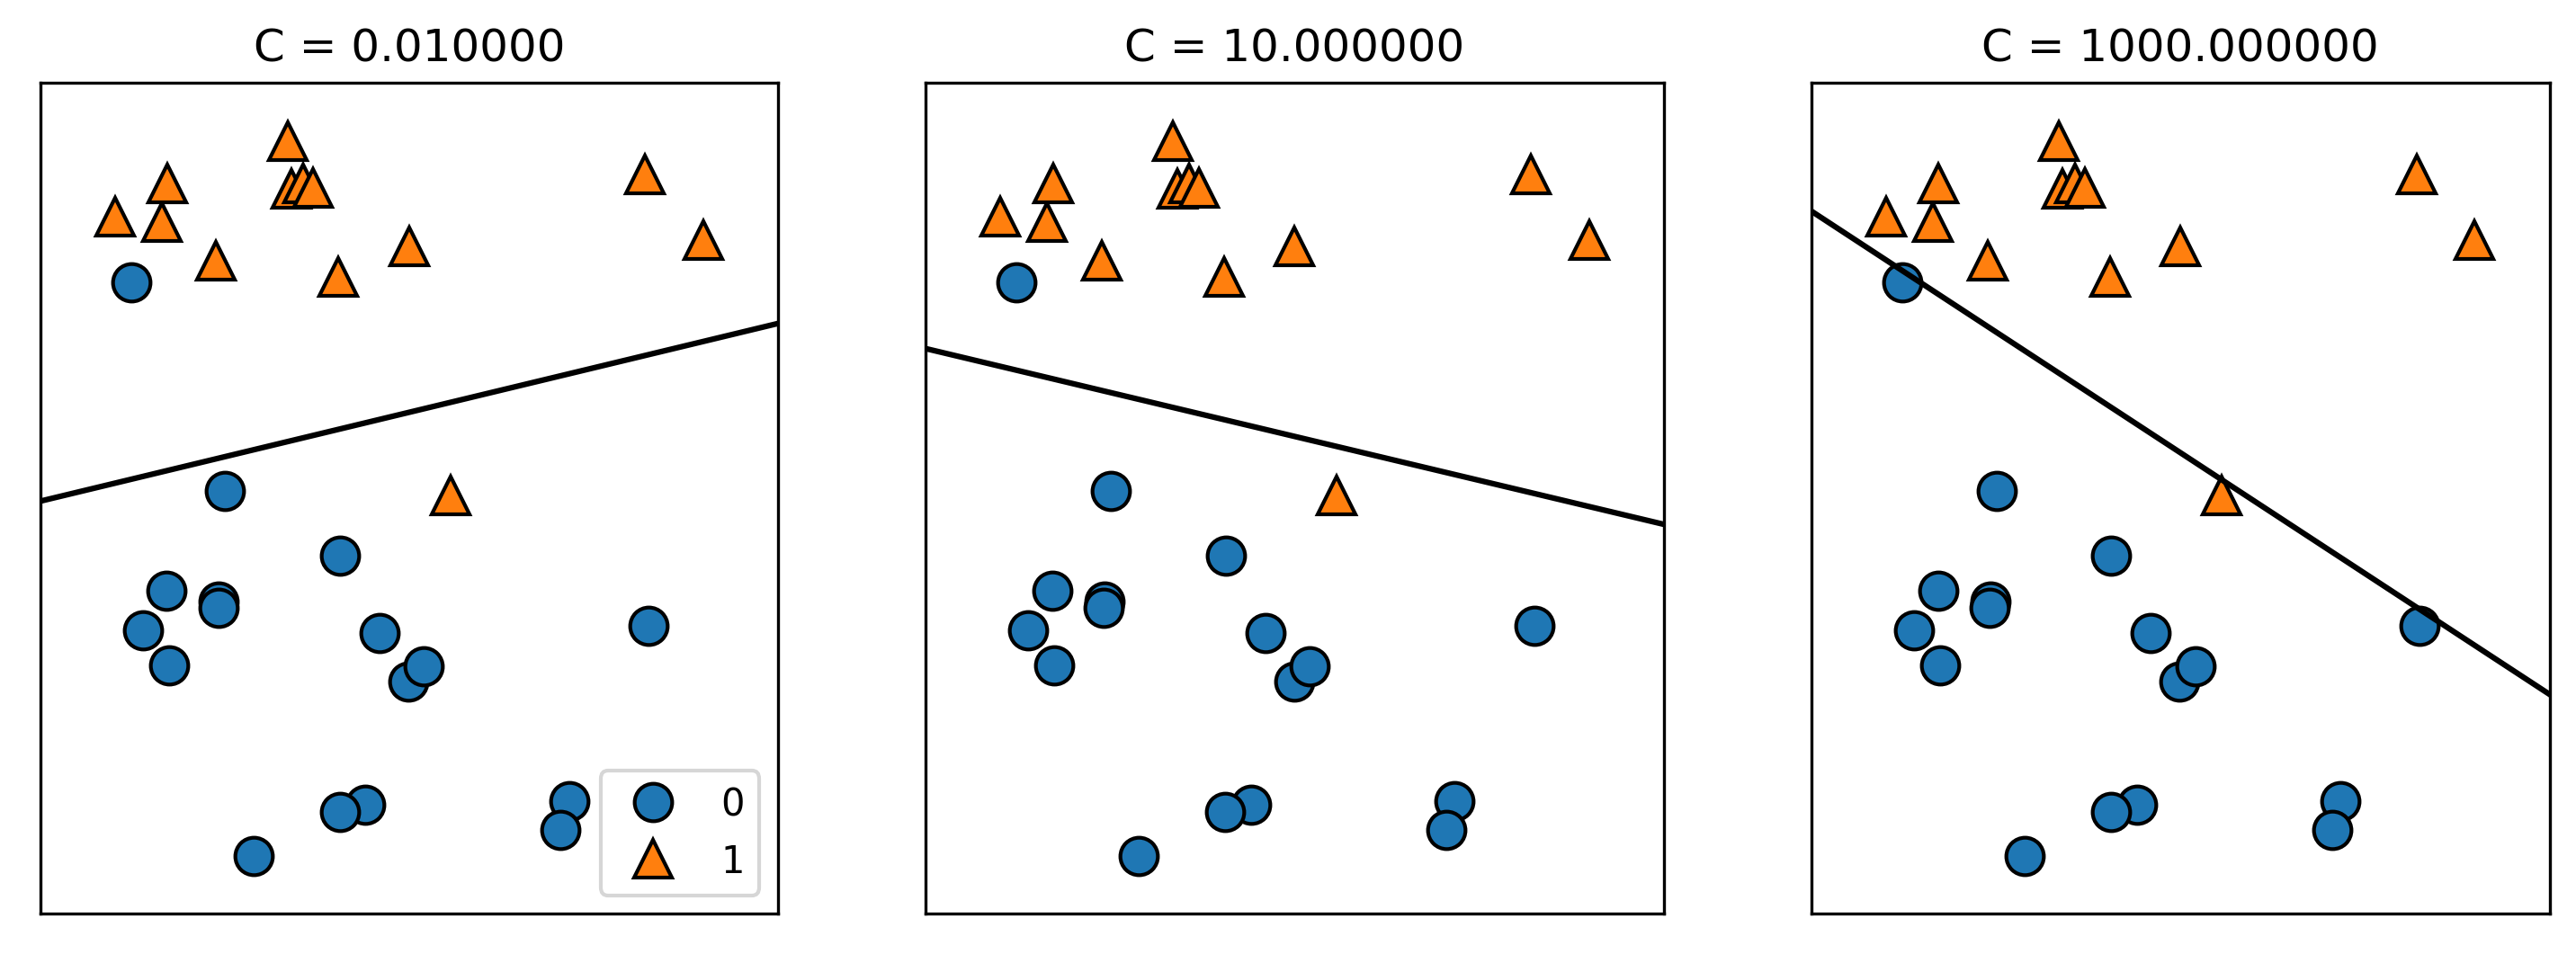

In [105]:
mglearn.plots.plot_linear_svc_regularization()

In [106]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train,y_train)
print("Training Set Score : {:.3f}".format(logreg.score(X_train,y_train)))
print("Test Set Score : {:.3f}".format(logreg.score(X_test,y_test)))

Training Set Score : 0.953
Test Set Score : 0.951


/home/lee/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print("Training Set Score : {:.3f}".format(logreg100.score(X_train,y_train)))
print("Test Set Score : {:.3f}".format(logreg100.score(X_test,y_test)))

Training Set Score : 0.946
Test Set Score : 0.958


/home/lee/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [110]:
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print("Training Set Score : {:.3f}".format(logreg001.score(X_train,y_train)))
print("Test Set Score : {:.3f}".format(logreg001.score(X_test,y_test)))

Training Set Score : 0.934
Test Set Score : 0.930


/home/lee/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


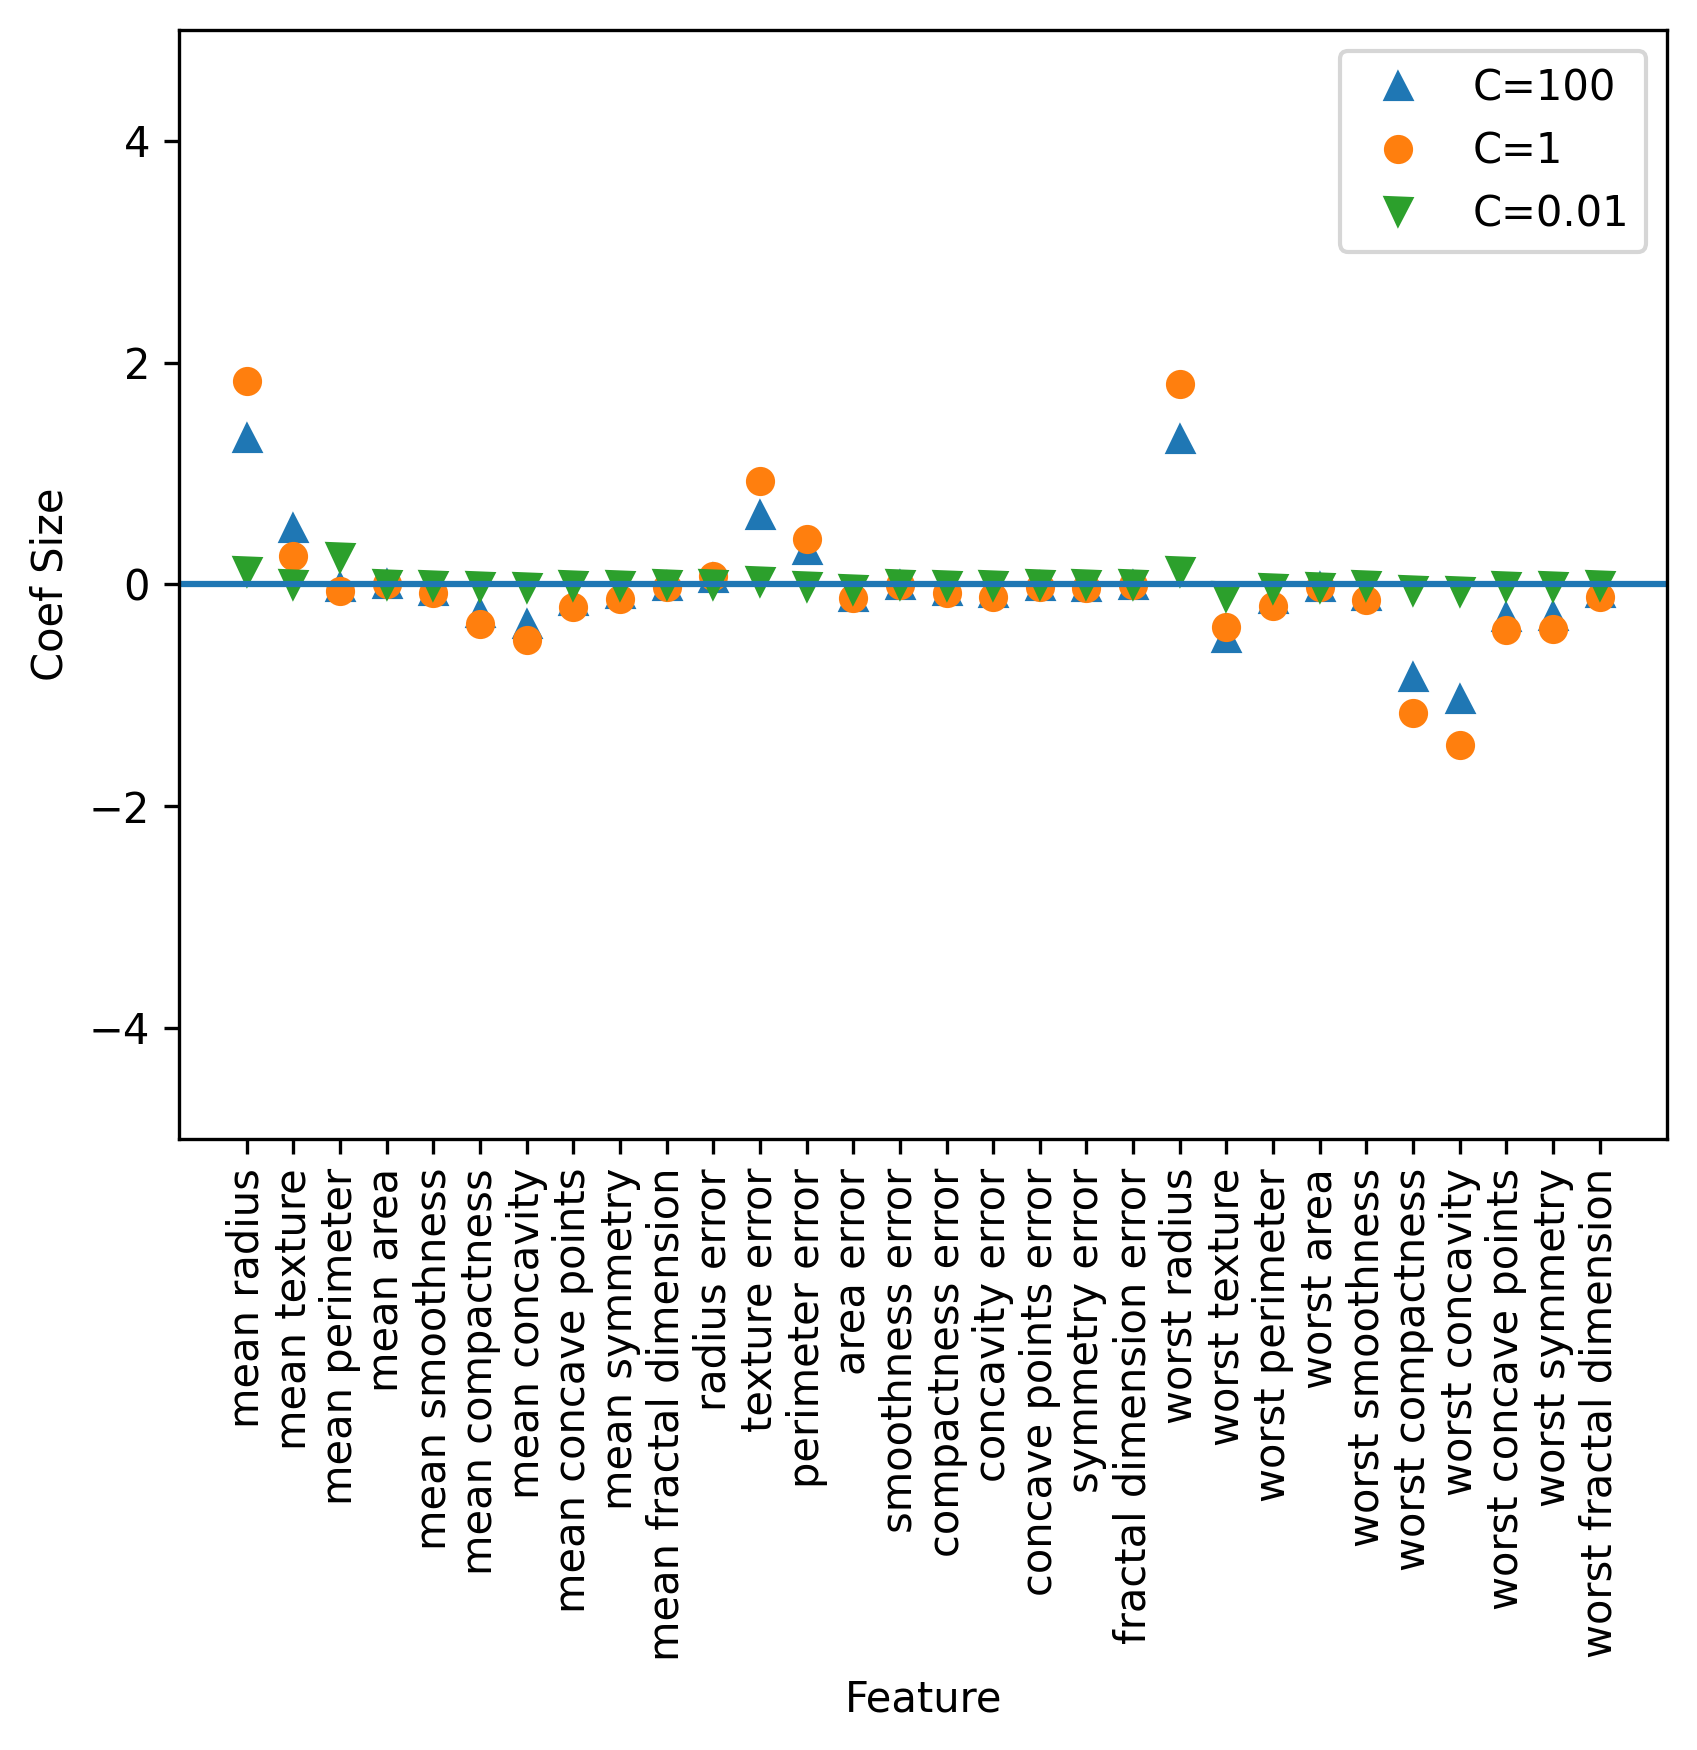

In [112]:
plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg001.coef_.T,'v',label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coef Size")
plt.legend()

C=0.001 Logistic Regression Training Accuracy : 0.91
C=0.001 Logistic Regression Test Accuracy : 0.92
C=1.000 Logistic Regression Training Accuracy : 0.96
C=1.000 Logistic Regression Test Accuracy : 0.96
C=100.000 Logistic Regression Training Accuracy : 0.99
C=100.000 Logistic Regression Test Accuracy : 0.98


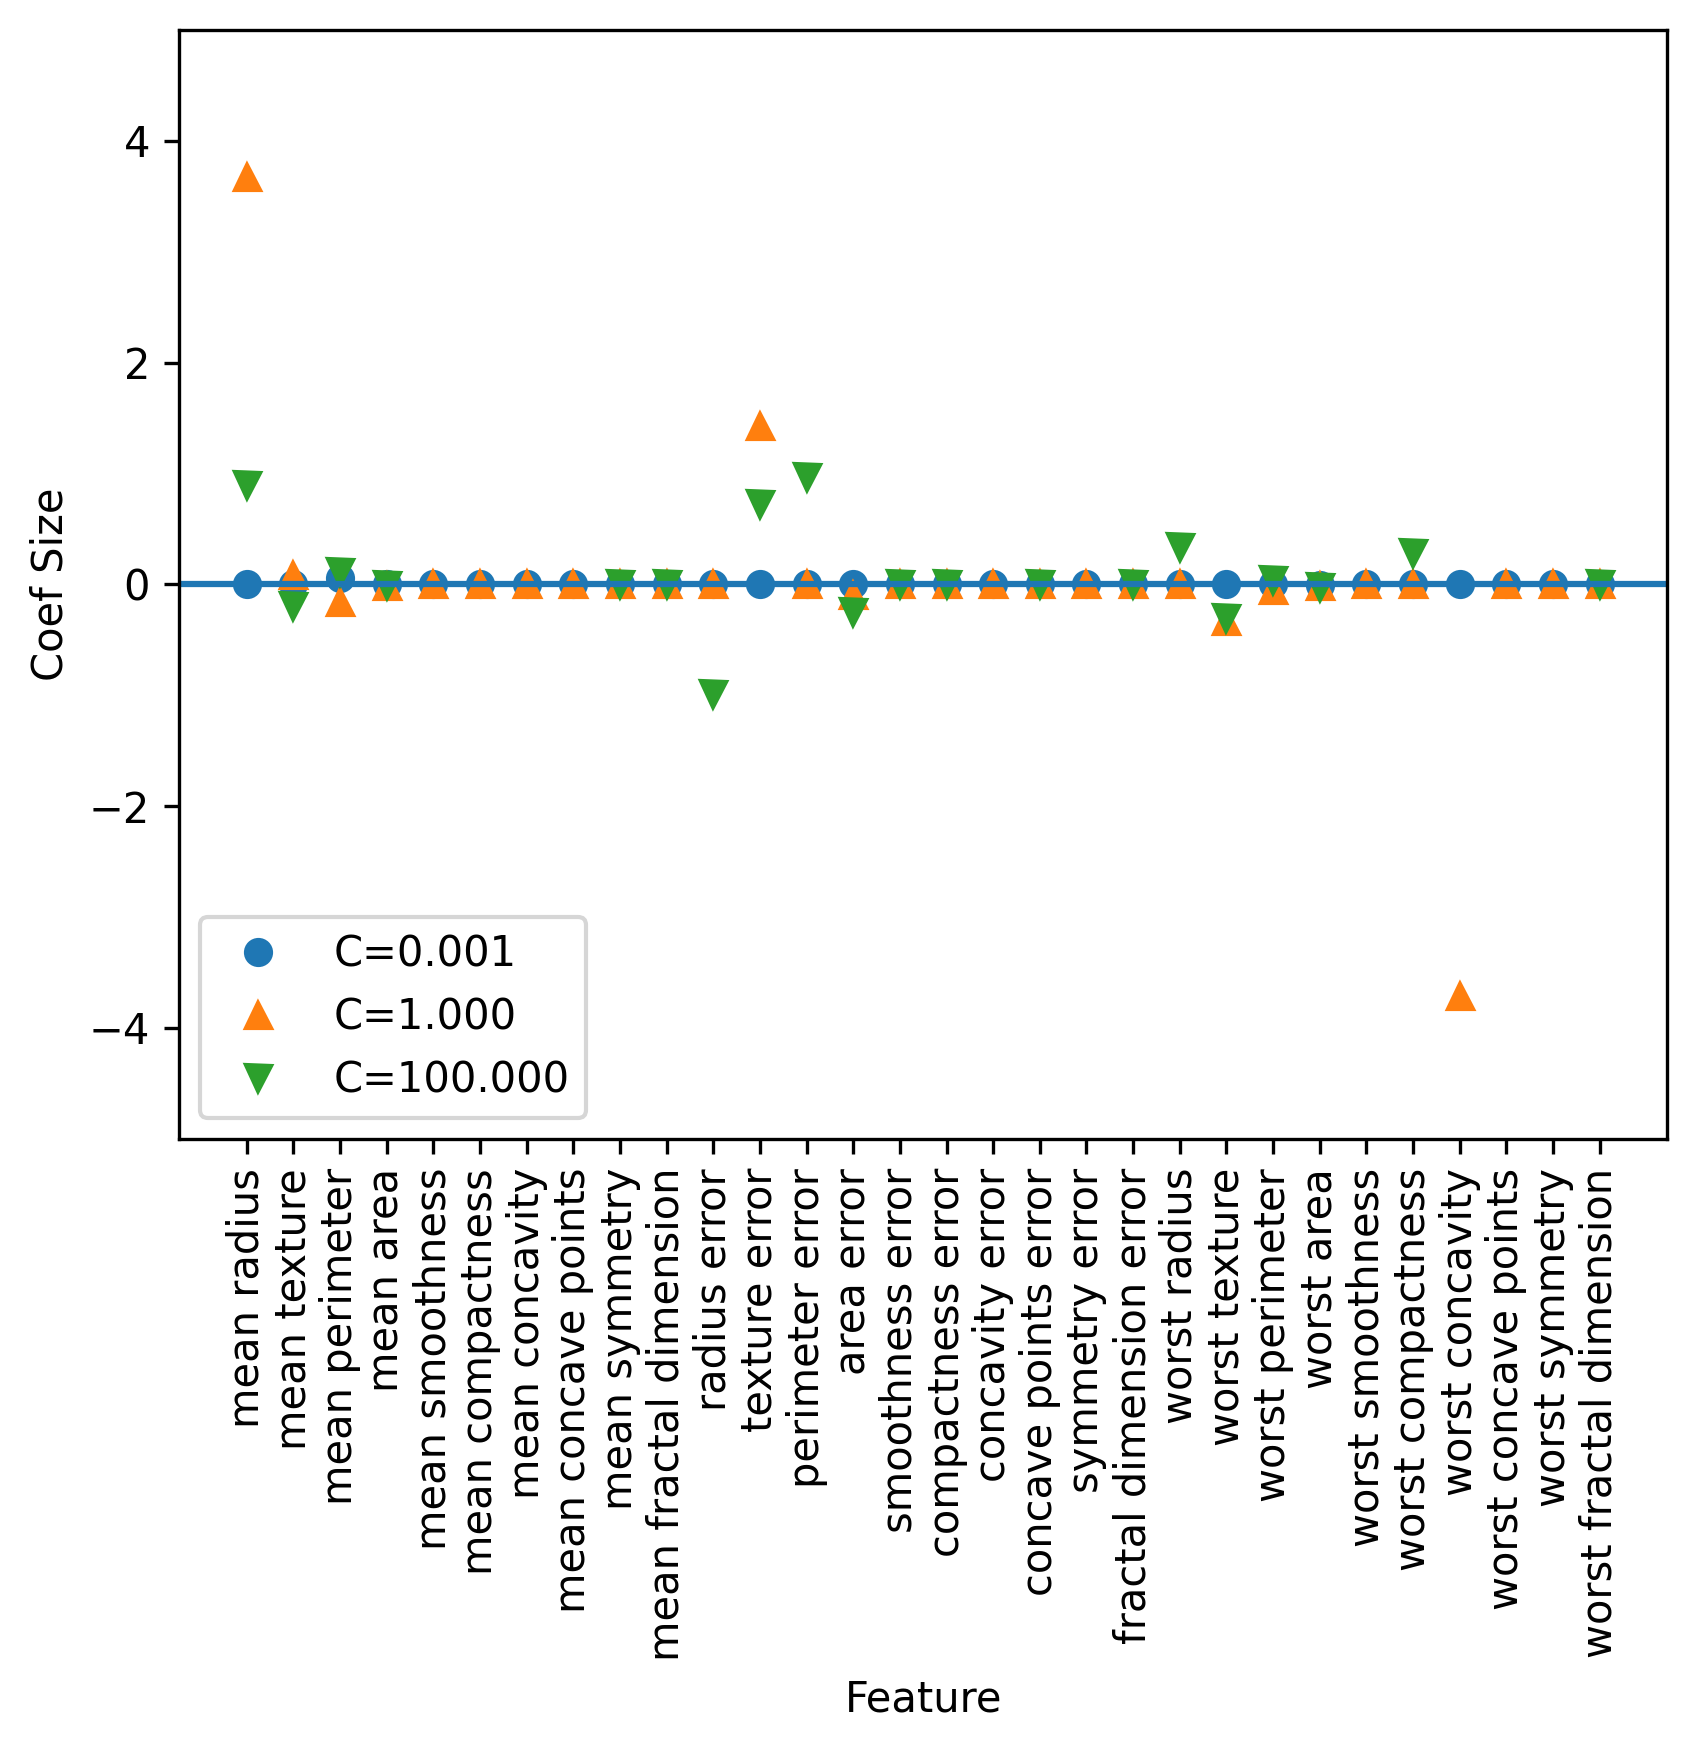

In [123]:
for C, marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver="liblinear").fit(X_train,y_train)
    print("C={:.3f} Logistic Regression Training Accuracy : {:.2f}".format(C, lr_l1.score(X_train,y_train)))
    print("C={:.3f} Logistic Regression Test Accuracy : {:.2f}".format(C, lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coef Size")
plt.ylim(-5,5)
plt.legend(loc=3)

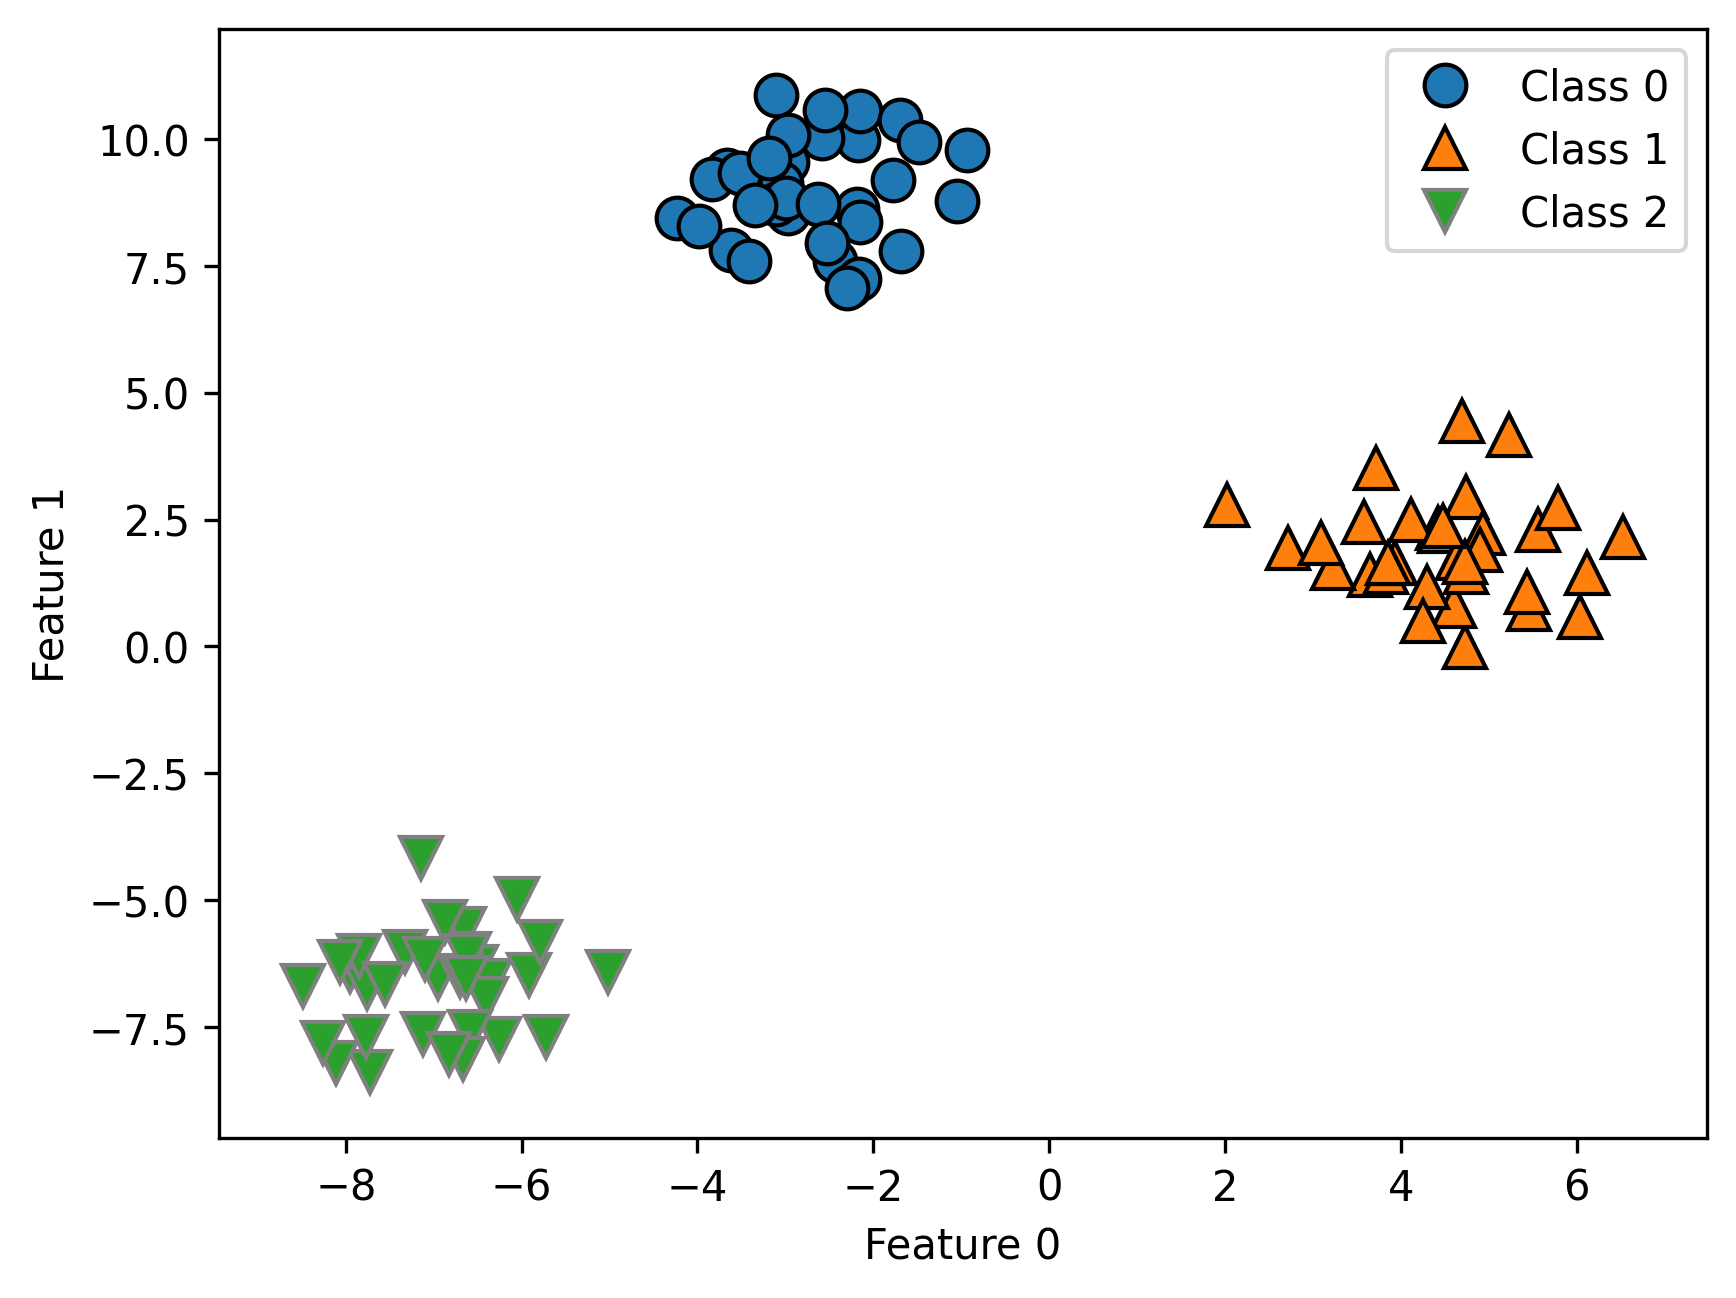

In [124]:
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class 2"])

In [125]:
linear_svm = LinearSVC().fit(X,y)
print("Coef Array Size : ", linear_svm.coef_.shape)
print("Section Array Size : ", linear_svm.intercept_.shape)

Coef Array Size :  (3, 2)
Section Array Size :  (3,)


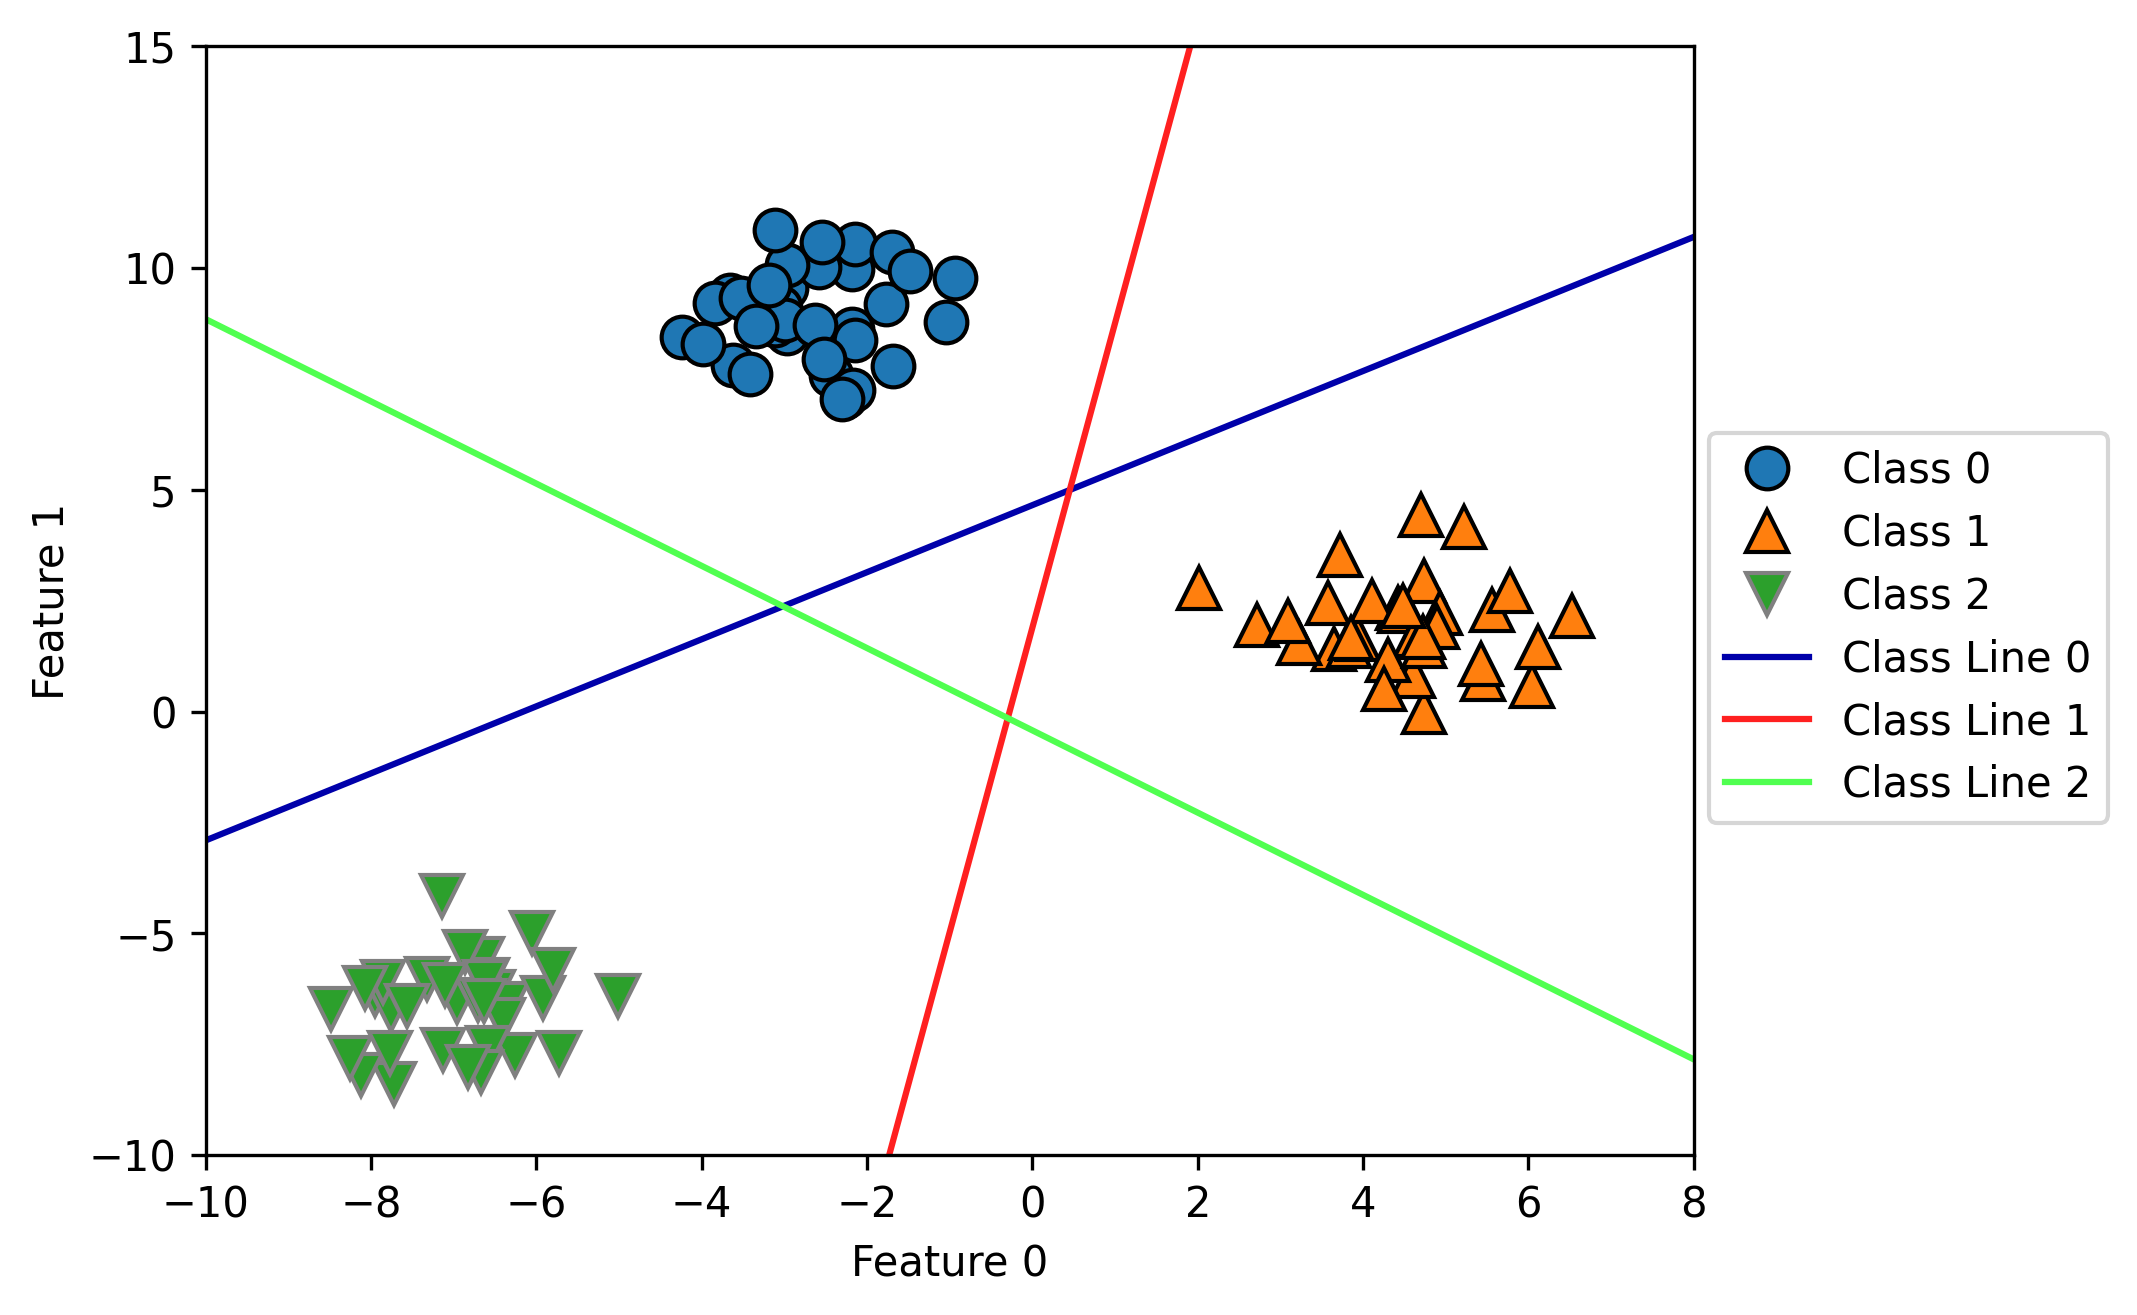

In [128]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line,-(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class 2","Class Line 0","Class Line 1","Class Line 2"], loc=(1.01,0.3))

Text(0, 0.5, 'Feature 1')

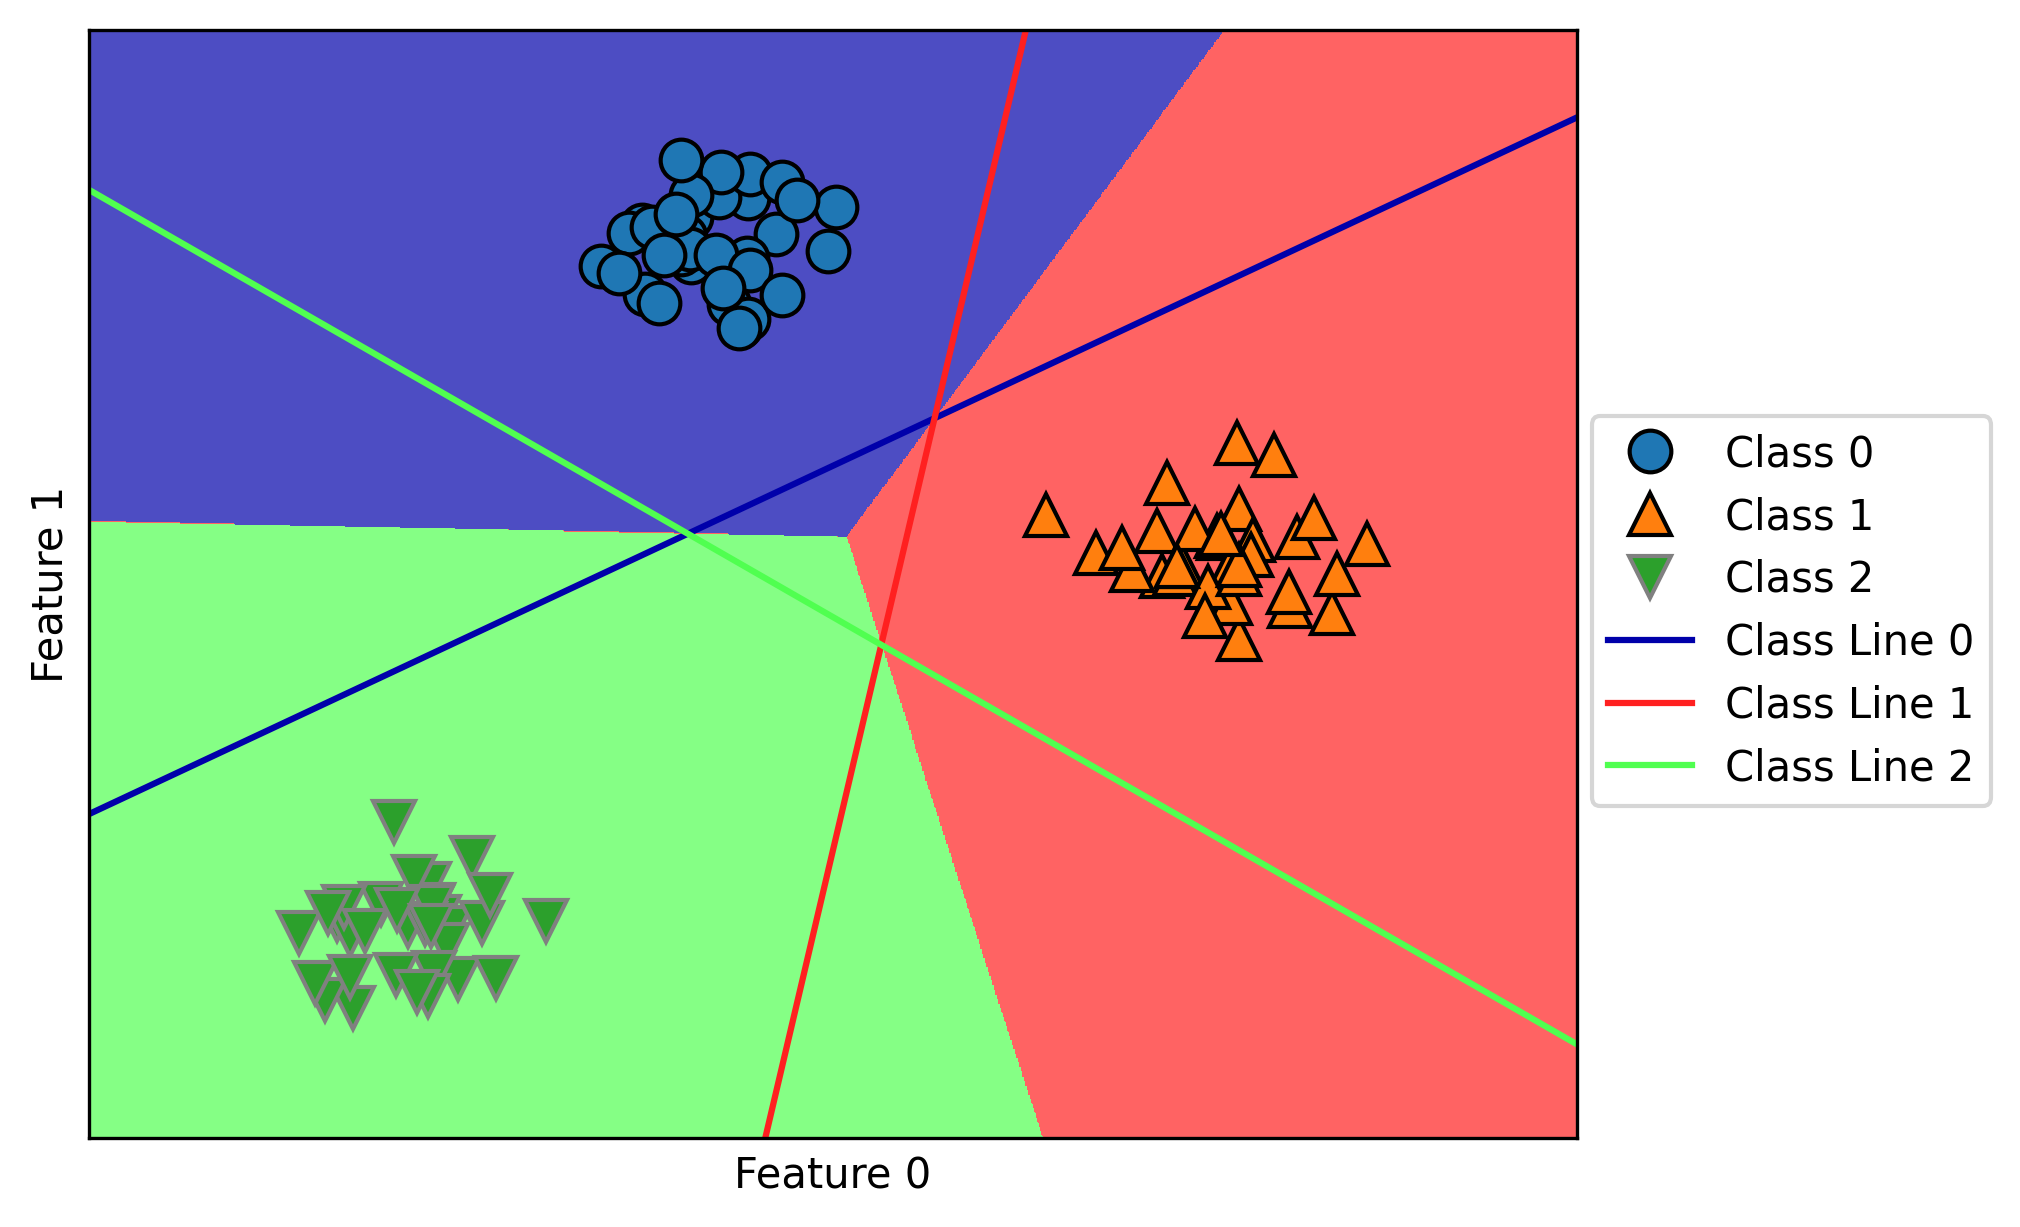

In [130]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(["Class 0","Class 1","Class 2","Class Line 0","Class Line 1","Class Line 2"], loc=(1.01,0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")